In [1]:
import matplotlib
import pylab as plt
import numpy as np
import pandas as pd 


In [2]:
from numpy import random
np.random.seed(42)
df=pd.read_csv(r'C:\machinelearning datasets\globalEmission.csv',na_values=['NA','?',' ', 'NaN'])
df = df.reindex(np.random.permutation(df.index)) #shuffledata
#permutation of index
#index of pandas, randomly select indices, redindex our inces
df.reset_index(inplace=True, drop=True) # Reset index
 
df[0:5] # Display top five rows


,X Coordinate (km),Y Coordinate (km),Measured Depth (m),Deviation (deg),Abandoned (True/False),Surface-Casing Weight (kg/m),Production-Casing Size (mm),Cumulative GAS Prod. (e3m3),Month Well Spudded,Classification,Emission Rate (m3/day)
0,588.1,476.3,NaN,NaN,True,NaN,177.8,32683.5,0.0,Non Serious,44.432680
1,62.4,666.9,491.7,NaN,False,35.7,139.7,NaN,0.0,Non Serious,29.998576
2,534.4,391.8,NaN,15.690192,True,NaN,177.8,32683.5,0.0,Serious,55.424137
3,298.7,583.0,NaN,NaN,True,35.7,139.7,32683.6,0.0,Serious,53.076994
4,513.8,434.9,2598.2,9.273310,False,NaN,114.3,32683.6,843.0,Serious,50.506939


In [3]:
df.shape

(1500, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   X Coordinate (km)             1500 non-null   float64
 1   Y Coordinate (km)             1500 non-null   float64
 2   Measured Depth (m)            1071 non-null   float64
 3   Deviation (deg)               556 non-null    float64
 4   Abandoned (True/False)        1500 non-null   bool   
 5   Surface-Casing Weight (kg/m)  1140 non-null   float64
 6   Production-Casing Size (mm)   1392 non-null   float64
 7   Cumulative GAS Prod. (e3m3)   1148 non-null   float64
 8   Month Well Spudded            1500 non-null   float64
 9   Classification                1500 non-null   object 
 10  Emission Rate (m3/day)        1500 non-null   float64
dtypes: bool(1), float64(9), object(1)
memory usage: 118.8+ KB


COMMENT

Measured Depth, Deviation, Surface-Casing Weight, Production-Casing Size, and Cumulative GAS Prod. are missing values.


In [5]:
df.describe()

,X Coordinate (km),Y Coordinate (km),Measured Depth (m),Deviation (deg),Surface-Casing Weight (kg/m),Production-Casing Size (mm),Cumulative GAS Prod. (e3m3),Month Well Spudded,Emission Rate (m3/day)
count,1500.000000,1500.000000,1071.000000,556.000000,1140.000000,1392.000000,1148.000000,1500.000000,1500.000000
mean,445.051933,489.247133,1421.464426,31.400825,41.920000,144.073420,32683.537195,177.501533,50.161205
std,174.153002,218.796603,943.375914,18.960863,12.611025,26.083219,0.093194,248.301182,9.912002
min,10.900000,1.400000,158.600000,0.231718,13.700000,73.000000,32683.300000,0.000000,11.750512
25%,339.300000,368.100000,674.150000,14.642007,35.700000,114.300000,32683.500000,0.000000,43.476749
50%,509.250000,494.000000,1102.800000,31.660038,35.700000,139.700000,32683.500000,0.000000,50.262507
75%,592.600000,595.325000,1912.900000,44.343357,48.100000,177.800000,32683.600000,321.000000,56.689195
max,649.600000,1186.100000,5418.900000,76.894237,107.200000,244.500000,32683.800000,1264.000000,78.843781


CORRELATION MATRIX BEING CALLED ON THE ENTIRE DATASET

In [6]:
corr_matrix=df.corr() 
corr_matrix

,X Coordinate (km),Y Coordinate (km),Measured Depth (m),Deviation (deg),Abandoned (True/False),Surface-Casing Weight (kg/m),Production-Casing Size (mm),Cumulative GAS Prod. (e3m3),Month Well Spudded,Emission Rate (m3/day)
X Coordinate (km),1.000000,-0.484104,0.048254,0.017460,0.019835,0.009637,0.174361,-0.010583,0.026822,0.040451
Y Coordinate (km),-0.484104,1.000000,-0.064153,-0.018059,-0.033477,0.241887,0.170239,-0.027537,-0.012090,0.003328
Measured Depth (m),0.048254,-0.064153,1.000000,0.418197,0.220428,-0.013083,-0.006192,0.535462,0.463943,0.395444
Deviation (deg),0.017460,-0.018059,0.418197,1.000000,0.094358,-0.034197,0.012396,0.358725,0.268597,0.125752
Abandoned (True/False),0.019835,-0.033477,0.220428,0.094358,1.000000,-0.028341,-0.013309,0.223509,0.156021,0.371188
Surface-Casing Weight (kg/m),0.009637,0.241887,-0.013083,-0.034197,-0.028341,1.000000,0.753323,-0.035566,-0.029418,0.051519
Production-Casing Size (mm),0.174361,0.170239,-0.006192,0.012396,-0.013309,0.753323,1.000000,-0.012092,-0.005246,0.014579
Cumulative GAS Prod. (e3m3),-0.010583,-0.027537,0.535462,0.358725,0.223509,-0.035566,-0.012092,1.000000,0.286453,0.359137
Month Well Spudded,0.026822,-0.012090,0.463943,0.268597,0.156021,-0.029418,-0.005246,0.286453,1.000000,0.293483
Emission Rate (m3/day),0.040451,0.003328,0.395444,0.125752,0.371188,0.051519,0.014579,0.359137,0.293483,1.000000


In [7]:
def corr_bar(df):#python function is creted
    """Plot correlation bar with the pair of atrribute with last column"""
    corr=df.corr()#ft.correlation
    Colms_sh=list(list(corr.columns))# list of column
    coefs=corr.values[:,-1][:-1]
    names=Colms_sh[:-1]
    r_ = pd.DataFrame( { 'coef': coefs, 'positive': coefs>=0  }, index = names )
    r_ = r_.sort_values(by=['coef'])
    r_['coef'].plot(kind='barh', color=r_['positive'].map({True: 'b', False: 'r'}))
    plt.xlabel('Correlation Coefficient',fontsize=6)
    plt.vlines(x=0,ymin=-0.5, ymax=10, color = 'k',linewidth=0.8,linestyle="dashed")
    plt.show()

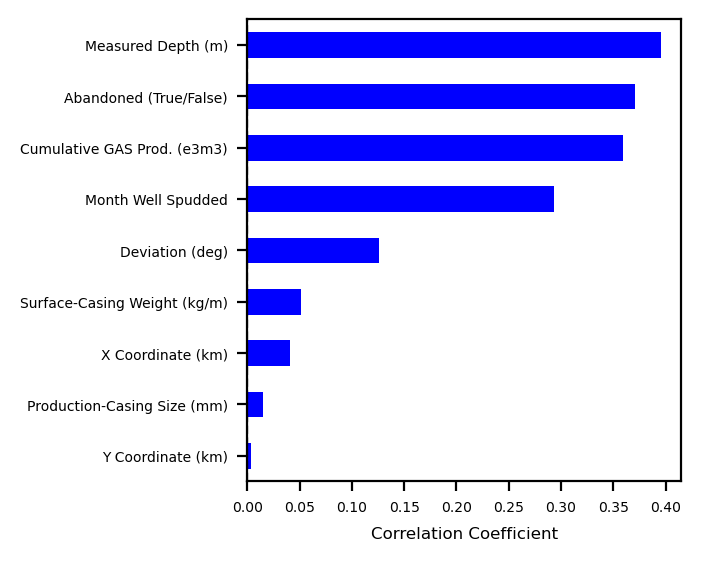

In [8]:
font = {'size'   : 5}
matplotlib.rc('font', **font)
ax1 = plt.subplots(figsize=(2.8, 3), dpi= 200, facecolor='w', edgecolor='k')#backcolour white and edge colour black

# Plot correlations of attributes with the last column
corr_bar(df) # make the plot of this function

With regard to Emission Rate (m3/day) variables like Measured Depth, Abandoned, Month Well Spuded, Cumulative GAS Prod. have a strong linear positively coorelated. However, Y Coordinate has a very weak correlation.

# HISTOGRAM OF ALL NUMERICAL COLUMNS OF THE GIVEN DATASET

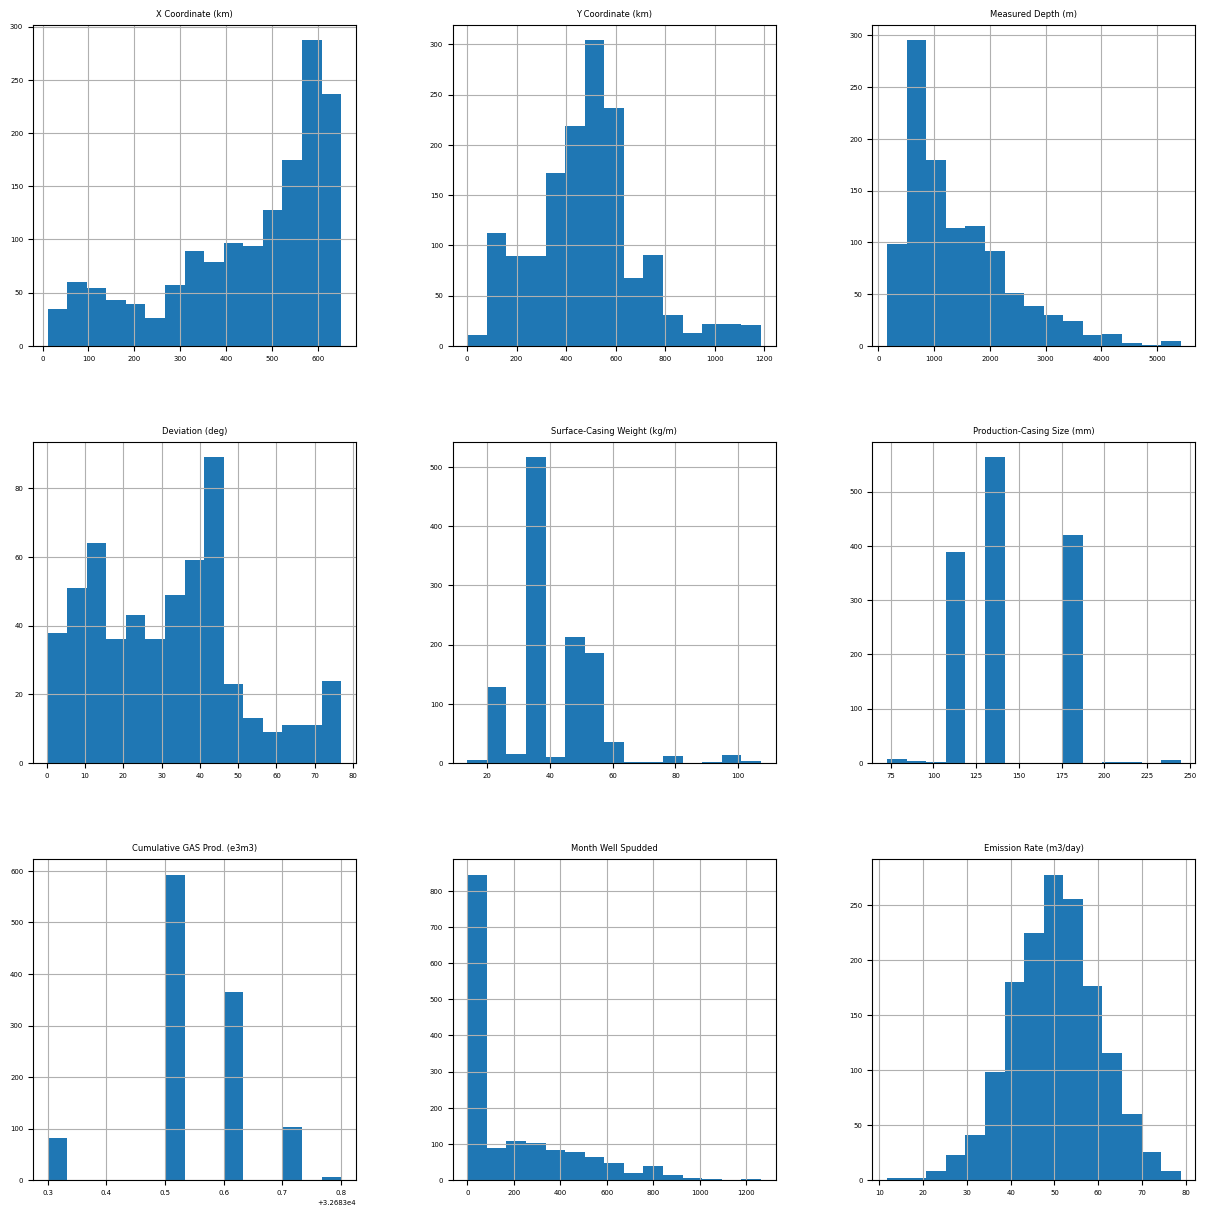

In [9]:
columns=['X Coordinate (km)','Y Coordinate (km)','Measured Depth (m)','Deviation (deg)', 'Surface-Casing Weight (kg/m)', 'Production-Casing Size (mm)', 'Cumulative GAS Prod. (e3m3)', 'Month Well Spudded', 'Emission Rate (m3/day)' ]# names of columns for which u want to make a histogram
df[columns].hist(bins=15, layout=(3, 3), figsize=(15,15)) # 3 rows and 3 columns # figure size is the spread of the histogram
plt.show()

Here we observe that Emission Rate, Deviation (deg), Measured Depth and Y coordinate have a normal distibution. X-Coordinate is negtaively skewed distribution. Cumulative Gas, measured Depth, Month Well Spudded are positively skewed distribution.

In [10]:
#Maing clear histogram
def histplt (val,bins,title,xlabl,xlimt,axt=None): #python function
    """ Function for histogram plotting"""
    from matplotlib.offsetbox import AnchoredText
    
    ax1 = axt or plt.axes()# left or right plot
    val=np.array(val) # values in the plot
    plt.hist(val, bins=bins,ec='black')      
    n=len(val) # number of values in the plot
    Mean=np.mean(val)
    SD=np.sqrt(np.var(val))
    Max=np.amax(val)
    Min=np.amin(val)
    txt='n=%.0f \n $\mu$=%.1f \n $\sigma$=%.1f \n Max=%.1f \n Min=%.1f'
    anchored_text = AnchoredText(txt %(n,Mean,SD,Max,Min), loc=1)
    ax1.add_artist(anchored_text)
    plt.title(title,fontsize=font['size']*1.25)   
    plt.xlabel(xlabl,fontsize=font['size'])            
    plt.ylabel('Frequency',fontsize=font['size'])
    plt.xlim(xlimt)
    ax1.grid(linewidth='0.35')

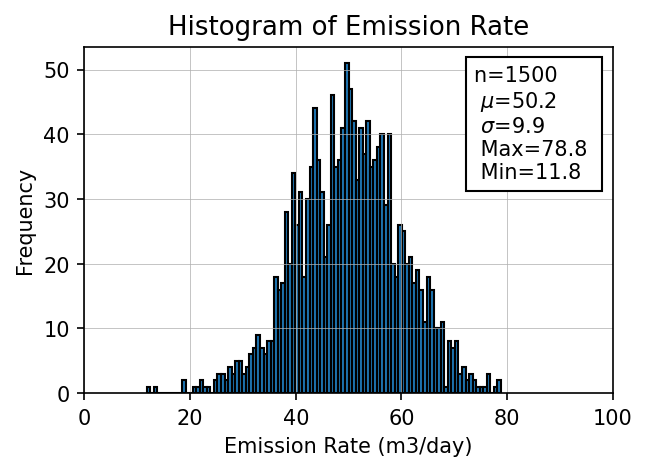

In [11]:
font = {'size'   : 10} #10 changes the font size of#s in ur plot
matplotlib.rc('font', **font)
fig = plt.subplots(figsize=(10, 3), dpi= 150, facecolor='w', edgecolor='k')#dpi makesplot small, dpi=100 to begin with

ax1=plt.subplot(1,2,1) 
val=df['Emission Rate (m3/day)']
histplt(val,bins=100,title='Histogram of Emission Rate',xlabl='Emission Rate (m3/day)',xlimt=(0,100),axt=ax1)
#hidplt function is above

In [12]:
def histplt (val,bins,title,xlabl,xlimt,axt=None): #python function
    """ Function for histogram plotting"""
    from matplotlib.offsetbox import AnchoredText
    
    ax1 = axt or plt.axes()# left or right plot
    val=np.array(val) # values in the plot
    plt.hist(val, bins=bins,ec='black')      
    n=len(val) # number of values in the plot
    Mean=np.mean(val)
    SD=np.sqrt(np.var(val))
    Max=np.amax(val)
    Min=np.amin(val)
    txt='n=%.0f \n $\mu$=%.1f \n $\sigma$=%.1f \n Max=%.1f \n Min=%.1f'
    anchored_text = AnchoredText(txt %(n,Mean,SD,Max,Min), loc=2)
    ax1.add_artist(anchored_text)
    plt.title(title,fontsize=font['size']*1.25)   
    plt.xlabel(xlabl,fontsize=font['size'])            
    plt.ylabel('Frequency',fontsize=font['size'])
    plt.xlim(xlimt)
    ax1.grid(linewidth='0.35')

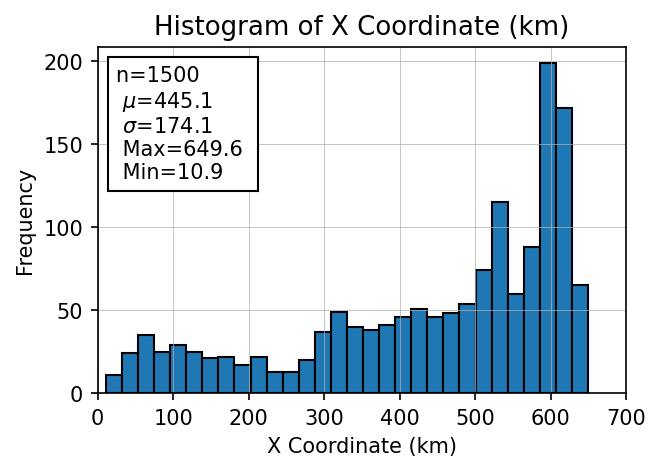

In [13]:

font = {'size'   : 10} #10 changes the font size of#s in ur plot
matplotlib.rc('font', **font)
fig = plt.subplots(figsize=(10, 3), dpi= 150, facecolor='w', edgecolor='k')#dpi makesplot small, dpi=100 to begin with

ax2=plt.subplot(1,2,2) 
val=df['X Coordinate (km)']
histplt(val,bins=30,title='Histogram of X Coordinate (km)',xlabl='X Coordinate (km)',xlimt=(0,700),axt=ax2)

Even though both the graphs have the same number of data poits, X Coordinate has a higher mean and higher standard deviation as compared to the histogram of emissisons. The max values for the X coordinate histogram is higher than Emission Rate. X Coordiante histogram is skewed towards right i.e. it depicts as negatively skewed distribution. On the contary, Emissions Rate histogram depicts a uniform distribution.

# Scatter plot

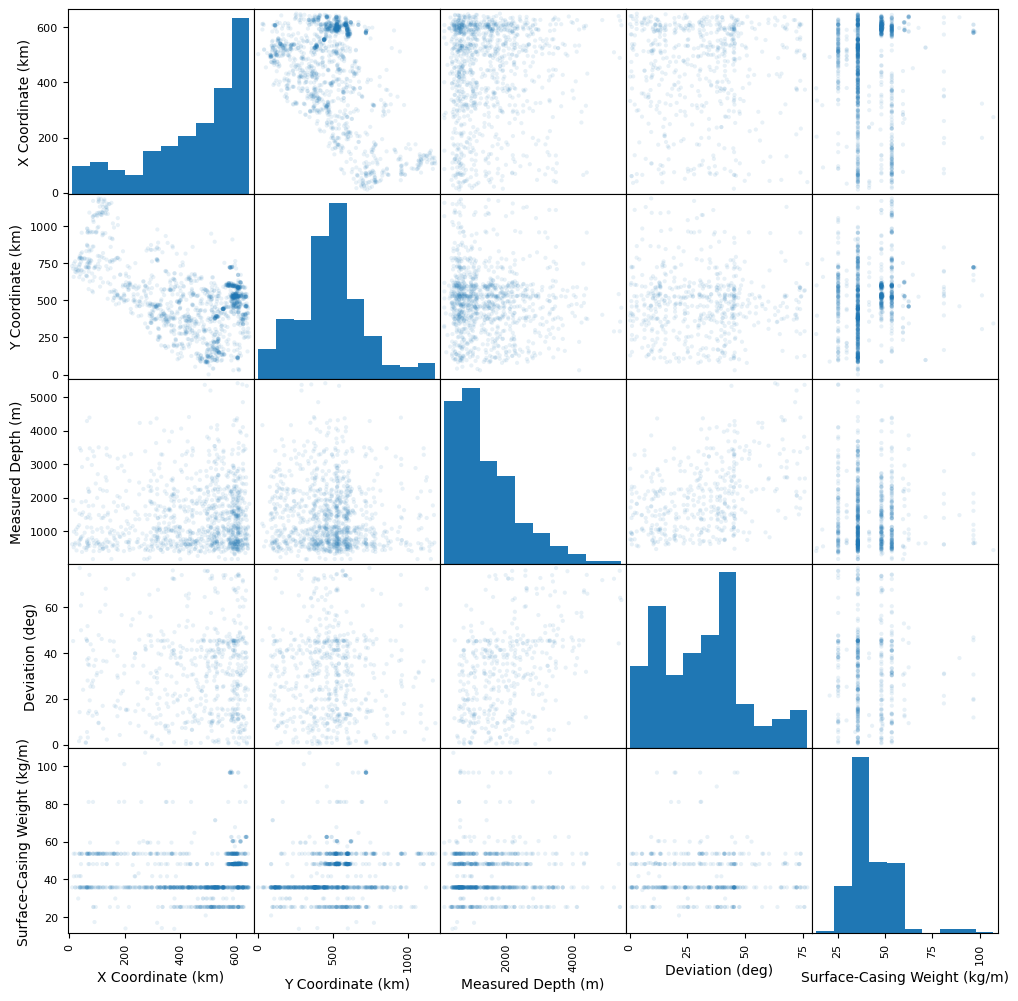

In [14]:
font = {'size'   : 10}
matplotlib.rc('font', **font)
from pandas.plotting import scatter_matrix # histrogram matrix diagonal u have a histogram of each variable

scatter_matrix(df[columns[0:5]],figsize=(12, 12),alpha=0.1) #what is alpha #columns[0:5] will inc the variables
plt.show()

Above a snapshot of scatterplots of first five variables in column names. These scatterplots hardly convery any information as they are very blurry.

# MAKING CLEARER CROSSPLOTS

In [15]:
def CrossPlot (x,y,xlabl,ylabl,axt=None):
    '''Cross plot between two variables'''
    from matplotlib.offsetbox import AnchoredText
    ax1 = axt or plt.axes()
    x=np.array(x)
    y=np.array(y)    
    n_x=len(x) #number of varibles
    Mean_x=np.mean(x)
    SD_x=np.sqrt(np.var(x)) 
    n_y=len(y)
    Mean_y=np.mean(y)
    SD_y=np.sqrt(np.var(y)) 
    corr=np.corrcoef(x,y)
    plt.plot(x,y,'ro',markersize=2,alpha=0.08)
    txt='$\\rho_{XY}$=%.3f \n $n$=%.0f \n $\mu_{X}$=%.1f \n $\sigma_{X}$=%.1f \n '
    txt+=' $\mu_{Y}$=%.1f \n $\sigma_{Y}$=%.1f'
    anchored_text = AnchoredText(txt %(corr[1,0], n_x,Mean_x,SD_x,Mean_y,SD_y),loc=4)
   
   

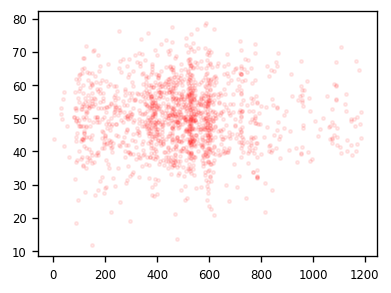

In [16]:
font = {'size'   :7 }
matplotlib.rc('font', **font)
fig=plt.figure(figsize=(8, 2.65), dpi= 120, facecolor='w', edgecolor='k')

ax1 = plt.subplot(1,2,1)
CrossPlot (x=df['Y Coordinate (km)'],y=df['Emission Rate (m3/day)'],xlabl='Y Coordinate (km)',
           ylabl='Emission Rate (m3/day)',axt=ax1)

Emission Rate has a weak negative linearly correlated with Y coordinate.

In [17]:
def CrossPlot (x,y,xlabl,ylabl,axt=None):
    '''Cross plot between two variables'''
    from matplotlib.offsetbox import AnchoredText
    ax1 = axt or plt.axes()
    x=np.array(x)
    y=np.array(y)    
    n_x=len(x) #number of varibles
    Mean_x=np.mean(x)
    SD_x=np.sqrt(np.var(x)) 
    n_y=len(y)
    Mean_y=np.mean(y)
    SD_y=np.sqrt(np.var(y)) 
    corr=np.corrcoef(x,y)
    plt.plot(x,y,'ro',markersize=2,alpha=0.08)
    txt='$\\rho_{XY}$=%.3f \n $n$=%.0f \n $\mu_{X}$=%.1f \n $\sigma_{X}$=%.1f \n '
    txt+=' $\mu_{Y}$=%.1f \n $\sigma_{Y}$=%.1f'
    anchored_text = AnchoredText(txt %(corr[1,0], n_x,Mean_x,SD_x,Mean_y,SD_y),loc=10)
   
    ax1.add_artist(anchored_text)
    plt.xlabel(xlabl,fontsize=font['size'])            
    plt.ylabel(ylabl,fontsize=font['size']) 

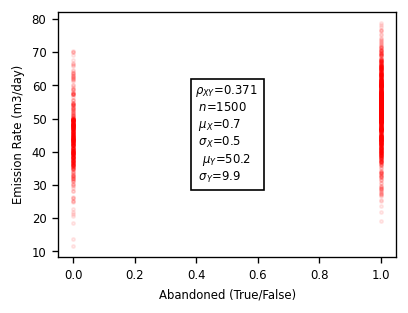

In [18]:
font = {'size'   :7 }
matplotlib.rc('font', **font)
fig=plt.figure(figsize=(8, 2.65), dpi= 120, facecolor='w', edgecolor='k')

ax2 = plt.subplot(1,2,2)
CrossPlot (x=df['Abandoned (True/False)'],y=df['Emission Rate (m3/day)'],xlabl='Abandoned (True/False)',
           ylabl='Emission Rate (m3/day)',axt=ax2)

# REMOVE OUTLIERS

In [19]:
def outlier_remove(df, n,name):
    """Delete rows for a specified column where values are out of +/- n*sd standard deviations
    df  : Pandas dataframe
    n   : n in the equation 𝑚±𝑛𝜎
    name: Column name
    """
    mean=df[name].mean() # Calclute mean of column
    sd=df[name].std()    # Calclute standard deviation of column
    drop_r = df.index[(mean -n * sd> df[name]) | (mean+n * sd< df[name])]# vertical line is or
    df.drop(drop_r, axis=0, inplace=True)# dropping rows that dont satisfy the code
    df.reset_index(inplace=True, drop=True) # Reset index

# Drop outliers in last column 'OIL Prod. (e3m3/month)'
outlier_remove(df, n=2.5,name='Emission Rate (m3/day)') #based on oil production
df.describe()

,X Coordinate (km),Y Coordinate (km),Measured Depth (m),Deviation (deg),Surface-Casing Weight (kg/m),Production-Casing Size (mm),Cumulative GAS Prod. (e3m3),Month Well Spudded,Emission Rate (m3/day)
count,1478.000000,1478.000000,1056.000000,552.000000,1122.000000,1371.000000,1130.000000,1478.000000,1478.000000
mean,444.461367,489.886333,1424.863636,31.357534,41.972282,144.075565,32683.537080,178.505007,50.291586
std,174.610273,219.042216,943.815439,19.010916,12.636631,26.083016,0.093625,249.017701,9.362271
min,10.900000,1.400000,158.600000,0.231718,13.700000,73.000000,32683.300000,0.000000,25.516553
25%,336.475000,369.575000,675.800000,14.533434,35.700000,114.300000,32683.500000,0.000000,43.557511
50%,509.850000,494.000000,1104.850000,31.641928,35.700000,139.700000,32683.500000,0.000000,50.280065
75%,592.500000,595.275000,1922.625000,44.343357,48.100000,177.800000,32683.600000,322.750000,56.625944
max,649.600000,1186.100000,5418.900000,76.894237,107.200000,244.500000,32683.800000,1264.000000,74.168289


The outliers have been removed since the number of rows have reduced.

# BINARY CLASSIFICATION

In [20]:
df_binary=df.copy()
df_binary.drop(['Emission Rate (m3/day)'], axis=1, inplace=True)
df_binary[0:5]

,X Coordinate (km),Y Coordinate (km),Measured Depth (m),Deviation (deg),Abandoned (True/False),Surface-Casing Weight (kg/m),Production-Casing Size (mm),Cumulative GAS Prod. (e3m3),Month Well Spudded,Classification
0,588.1,476.3,NaN,NaN,True,NaN,177.8,32683.5,0.0,Non Serious
1,62.4,666.9,491.7,NaN,False,35.7,139.7,NaN,0.0,Non Serious
2,534.4,391.8,NaN,15.690192,True,NaN,177.8,32683.5,0.0,Serious
3,298.7,583.0,NaN,NaN,True,35.7,139.7,32683.6,0.0,Serious
4,513.8,434.9,2598.2,9.273310,False,NaN,114.3,32683.6,843.0,Serious


Text(0, 0.5, 'Frequency')

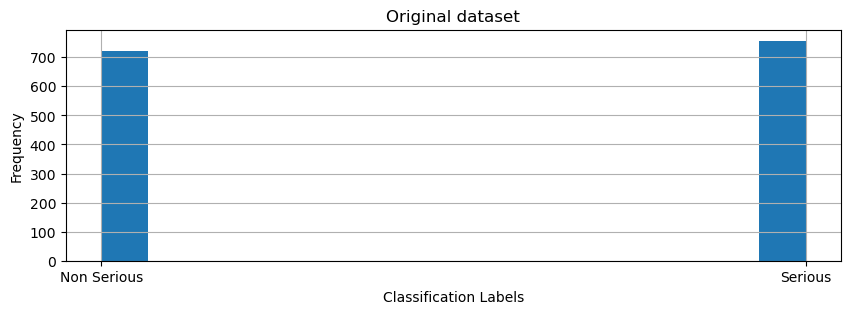

In [21]:
font = {'size'   : 10}
matplotlib.rc('font', **font)

fig = plt.subplots(figsize=(10, 3), dpi= 100, facecolor='w', edgecolor='k')


df_binary['Classification'].hist(bins=15)
plt.title("Original dataset")
plt.xlabel("Classification Labels")
plt.ylabel("Frequency")

In [22]:
df_binary['Classification'].value_counts()

Serious        757
Non Serious    721
Name: Classification, dtype: int64

In [23]:
df_binary['Classification']=df_binary['Classification'].replace('Serious', 1)
df_binary['Classification']=df_binary['Classification'].replace('Non Serious', 0)
df_binary[0:5]

,X Coordinate (km),Y Coordinate (km),Measured Depth (m),Deviation (deg),Abandoned (True/False),Surface-Casing Weight (kg/m),Production-Casing Size (mm),Cumulative GAS Prod. (e3m3),Month Well Spudded,Classification
0,588.1,476.3,NaN,NaN,True,NaN,177.8,32683.5,0.0,0
1,62.4,666.9,491.7,NaN,False,35.7,139.7,NaN,0.0,0
2,534.4,391.8,NaN,15.690192,True,NaN,177.8,32683.5,0.0,1
3,298.7,583.0,NaN,NaN,True,35.7,139.7,32683.6,0.0,1
4,513.8,434.9,2598.2,9.273310,False,NaN,114.3,32683.6,843.0,1



SPLIT DATA INTO TEST AND TRAINING DATA BY STARTIFIED SAMPLING

In [24]:
from sklearn.model_selection import StratifiedShuffleSplit

# Training and Test
spt = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)#always use shuffle
for train_idx, test_idx in spt.split(df_binary, df_binary['Classification']):#split training and testing data based on Classes 
    train_set_strat = df_binary.loc[train_idx]
    test_set_strat  = df_binary.loc[test_idx]  
    
for dataset in (train_set_strat, test_set_strat): dataset.reset_index(inplace=True, drop=True) # Reset index
train_set_strat[0:4]

,X Coordinate (km),Y Coordinate (km),Measured Depth (m),Deviation (deg),Abandoned (True/False),Surface-Casing Weight (kg/m),Production-Casing Size (mm),Cumulative GAS Prod. (e3m3),Month Well Spudded,Classification
0,524.5,380.2,786.2,19.348187,True,35.7,139.7,32683.6,650.7,1
1,46.3,823.2,2915.5,65.623685,True,35.7,139.7,32683.7,814.2,1
2,637.9,460.2,1050.0,NaN,False,62.5,NaN,32683.5,209.7,0
3,605.3,555.2,NaN,24.413819,True,53.6,177.8,32683.3,0.0,1


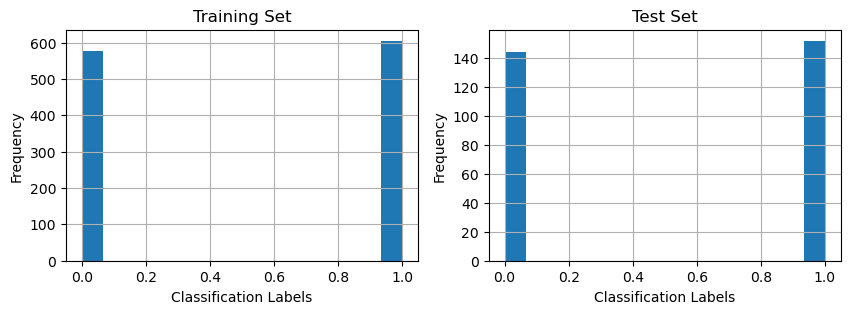

In [25]:
font = {'size'   : 10}
matplotlib.rc('font', **font)

fig = plt.subplots(figsize=(10, 3), dpi= 100, facecolor='w', edgecolor='k')

ax1=plt.subplot(1,2,1)
train_set_strat['Classification'].hist(bins=15)
plt.title("Training Set")
plt.xlabel("Classification Labels")
plt.ylabel("Frequency")

ax2=plt.subplot(1,2,2) 
test_set_strat['Classification'].hist(bins=15)
plt.title("Test Set")
plt.xlabel("Classification Labels")
plt.ylabel("Frequency")
plt.show()

STRAFIED SAMPLING IN TRAINING DATASET

In [26]:
train_set_strat['Classification'].value_counts()

1    605
0    577
Name: Classification, dtype: int64

In [27]:
# Note that drop() creates a copy and does not affect train_set_strat
X_train = train_set_strat.drop("Classification", axis=1)# remove target
y_train = train_set_strat["Classification"].values# only taget values

In [28]:
X_train

,X Coordinate (km),Y Coordinate (km),Measured Depth (m),Deviation (deg),Abandoned (True/False),Surface-Casing Weight (kg/m),Production-Casing Size (mm),Cumulative GAS Prod. (e3m3),Month Well Spudded
0,524.5,380.2,786.2,19.348187,True,35.7,139.7,32683.6,650.7
1,46.3,823.2,2915.5,65.623685,True,35.7,139.7,32683.7,814.2
2,637.9,460.2,1050.0,NaN,False,62.5,NaN,32683.5,209.7
3,605.3,555.2,NaN,24.413819,True,53.6,177.8,32683.3,0.0
4,594.0,447.4,1525.0,44.209760,True,48.1,177.8,32683.6,578.4
...,...,...,...,...,...,...,...,...,...
1177,36.4,655.8,716.6,NaN,True,41.7,139.7,32683.6,0.0
1178,605.1,512.3,1871.1,NaN,True,NaN,177.8,32683.5,0.0
1179,604.6,487.3,NaN,22.017888,True,35.7,114.3,32683.5,0.0
1180,482.8,248.6,1743.1,45.737238,True,NaN,114.3,32683.7,0.0


In [29]:
y_train

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [30]:
y_train.shape

(1182,)

In [31]:
X_train['Abandoned (True/False)']=X_train['Abandoned (True/False)'].replace(False, 0) # Replace False with 0

X_train['Abandoned (True/False)']=X_train['Abandoned (True/False)'].replace(True, 1)

In [32]:
X_train

,X Coordinate (km),Y Coordinate (km),Measured Depth (m),Deviation (deg),Abandoned (True/False),Surface-Casing Weight (kg/m),Production-Casing Size (mm),Cumulative GAS Prod. (e3m3),Month Well Spudded
0,524.5,380.2,786.2,19.348187,1,35.7,139.7,32683.6,650.7
1,46.3,823.2,2915.5,65.623685,1,35.7,139.7,32683.7,814.2
2,637.9,460.2,1050.0,NaN,0,62.5,NaN,32683.5,209.7
3,605.3,555.2,NaN,24.413819,1,53.6,177.8,32683.3,0.0
4,594.0,447.4,1525.0,44.209760,1,48.1,177.8,32683.6,578.4
...,...,...,...,...,...,...,...,...,...
1177,36.4,655.8,716.6,NaN,1,41.7,139.7,32683.6,0.0
1178,605.1,512.3,1871.1,NaN,1,NaN,177.8,32683.5,0.0
1179,604.6,487.3,NaN,22.017888,1,35.7,114.3,32683.5,0.0
1180,482.8,248.6,1743.1,45.737238,1,NaN,114.3,32683.7,0.0


In [33]:
#correlation matrix
corr_matrix=X_train.corr() #data is Oil_Prod
corr_matrix

,X Coordinate (km),Y Coordinate (km),Measured Depth (m),Deviation (deg),Abandoned (True/False),Surface-Casing Weight (kg/m),Production-Casing Size (mm),Cumulative GAS Prod. (e3m3),Month Well Spudded
X Coordinate (km),1.000000,-0.481253,0.054419,0.009126,0.033793,0.007028,0.180924,0.013862,0.032646
Y Coordinate (km),-0.481253,1.000000,-0.087773,-0.050136,-0.059897,0.236915,0.149832,-0.042228,-0.006862
Measured Depth (m),0.054419,-0.087773,1.000000,0.433371,0.207718,-0.038686,0.005027,0.519683,0.467056
Deviation (deg),0.009126,-0.050136,0.433371,1.000000,0.078170,-0.079402,0.005725,0.359363,0.290828
Abandoned (True/False),0.033793,-0.059897,0.207718,0.078170,1.000000,-0.036207,-0.017304,0.220642,0.140777
Surface-Casing Weight (kg/m),0.007028,0.236915,-0.038686,-0.079402,-0.036207,1.000000,0.747478,-0.049178,-0.031654
Production-Casing Size (mm),0.180924,0.149832,0.005027,0.005725,-0.017304,0.747478,1.000000,-0.008718,0.023822
Cumulative GAS Prod. (e3m3),0.013862,-0.042228,0.519683,0.359363,0.220642,-0.049178,-0.008718,1.000000,0.275776
Month Well Spudded,0.032646,-0.006862,0.467056,0.290828,0.140777,-0.031654,0.023822,0.275776,1.000000


Here we observe strong positive linear coorelation between the following features ranked in the order of highest to lowest:

Production-Casing Size (mm) and Surface-Casing Weight (kg/m)
Measured Depth (m) and Month Well Spudded
Measured Depth (m) and Cumulative GAS Prod. (e3m3)
Deviation (deg) and Cumulative GAS Prod. (e3m3)
Measured Depth (m) and Deviation (deg)
Y Coordinate (km) & Surface-Casing Weight (kg/m)
Here we observe strong negative linear coorelation between the following features ranked in the order of highest to lowest:

Y Coordinate (km)and X Coordinate (km)

In [34]:
corr_matrix["Measured Depth (m)"].sort_values(ascending=False)

Measured Depth (m)              1.000000
Cumulative GAS Prod. (e3m3)     0.519683
Month Well Spudded              0.467056
Deviation (deg)                 0.433371
Abandoned (True/False)          0.207718
X Coordinate (km)               0.054419
Production-Casing Size (mm)     0.005027
Surface-Casing Weight (kg/m)   -0.038686
Y Coordinate (km)              -0.087773
Name: Measured Depth (m), dtype: float64

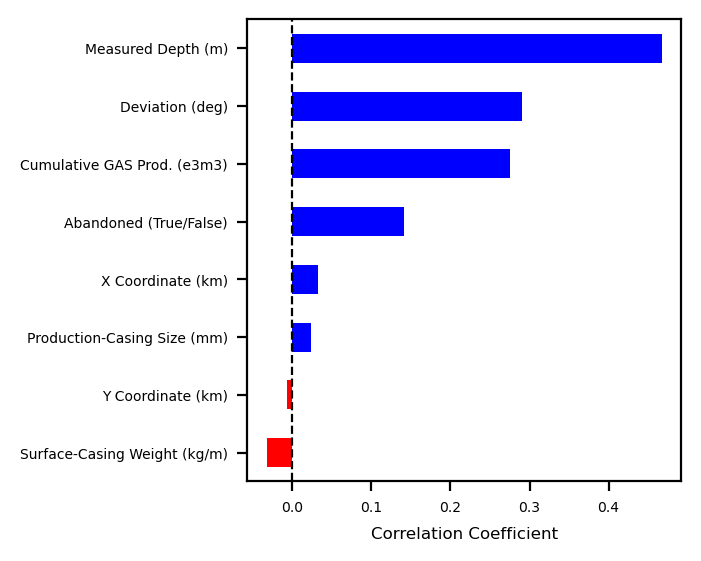

In [35]:
font = {'size'   : 5}
matplotlib.rc('font', **font)
ax1 = plt.subplots(figsize=(2.8, 3), dpi= 200, facecolor='w', edgecolor='k')#backcolour white and edge colour black

# Plot correlations of attributes with the last column
corr_bar(X_train) # make the plot of this function

Measured Depth, Deviation, followed by Cumulative GAS Prod. (e3m3) have the strongest positive correlation. Y-coordinate and Surface-Casing Weight have a negative coorelation.

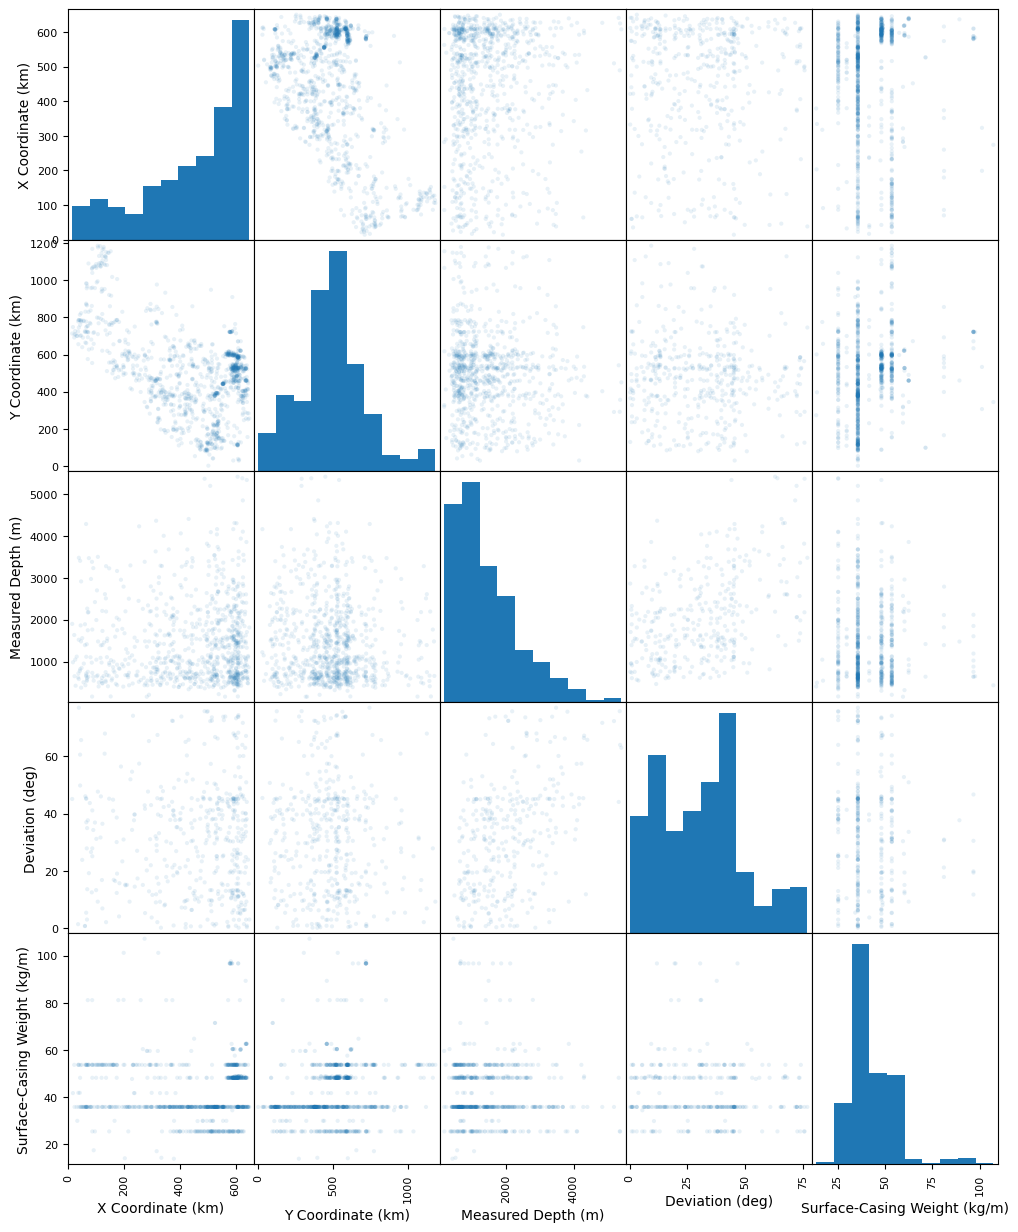

In [36]:
font = {'size'   : 10}
matplotlib.rc('font', **font)
from pandas.plotting import scatter_matrix # histrogram matrix diagonal u have a histogram of each variable

scatter_matrix(X_train[columns[0:5]],figsize=(12, 15),alpha=0.1) 
plt.show()

In [37]:
def CrossPlot (x,y,xlabl,ylabl,axt=None):
    '''Cross plot between two variables'''
    from matplotlib.offsetbox import AnchoredText
    ax1 = axt or plt.axes()
    x=np.array(x)
    y=np.array(y)    
    n_x=len(x) #number of varibles
    Mean_x=np.mean(x)
    SD_x=np.sqrt(np.var(x)) 
    n_y=len(y)
    Mean_y=np.mean(y)
    SD_y=np.sqrt(np.var(y)) 
    corr=np.corrcoef(x,y)
    plt.plot(x,y,'ro',markersize=2,alpha=0.08)
    txt='$\\rho_{XY}$=%.3f \n $n$=%.0f \n $\mu_{X}$=%.1f \n $\sigma_{X}$=%.1f \n '
    txt+=' $\mu_{Y}$=%.1f \n $\sigma_{Y}$=%.1f'
    anchored_text = AnchoredText(txt %(corr[1,0], n_x,Mean_x,SD_x,Mean_y,SD_y),loc=3)
   
    ax1.add_artist(anchored_text)
    plt.xlabel(xlabl,fontsize=font['size'])            
    plt.ylabel(ylabl,fontsize=font['size']) 

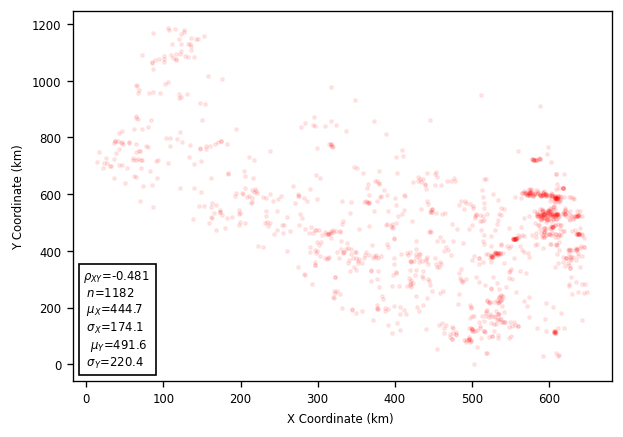

In [38]:
font = {'size'   :7 }
matplotlib.rc('font', **font)
fig=plt.figure(figsize=(12.75,4), dpi= 120, facecolor='w', edgecolor='k')

ax1 = plt.subplot(1,2,1)
CrossPlot (x=X_train['X Coordinate (km)'],y=X_train['Y Coordinate (km)'],xlabl='X Coordinate (km) ',
           ylabl='Y Coordinate (km)',axt=ax1)

As expected both X and Y coordinate are weakly negative correlation. On the other hand, both Abandoned(True/False) and X coordinate are weak positive correlation. The mean and standard deviation of of the plot between X and Y coordinate is high owing to the high values. On the contary, the standard deviation and mean of abandoned wells is less than 1 since the values its value ranages from 0 to 1.

HISTOGRAM

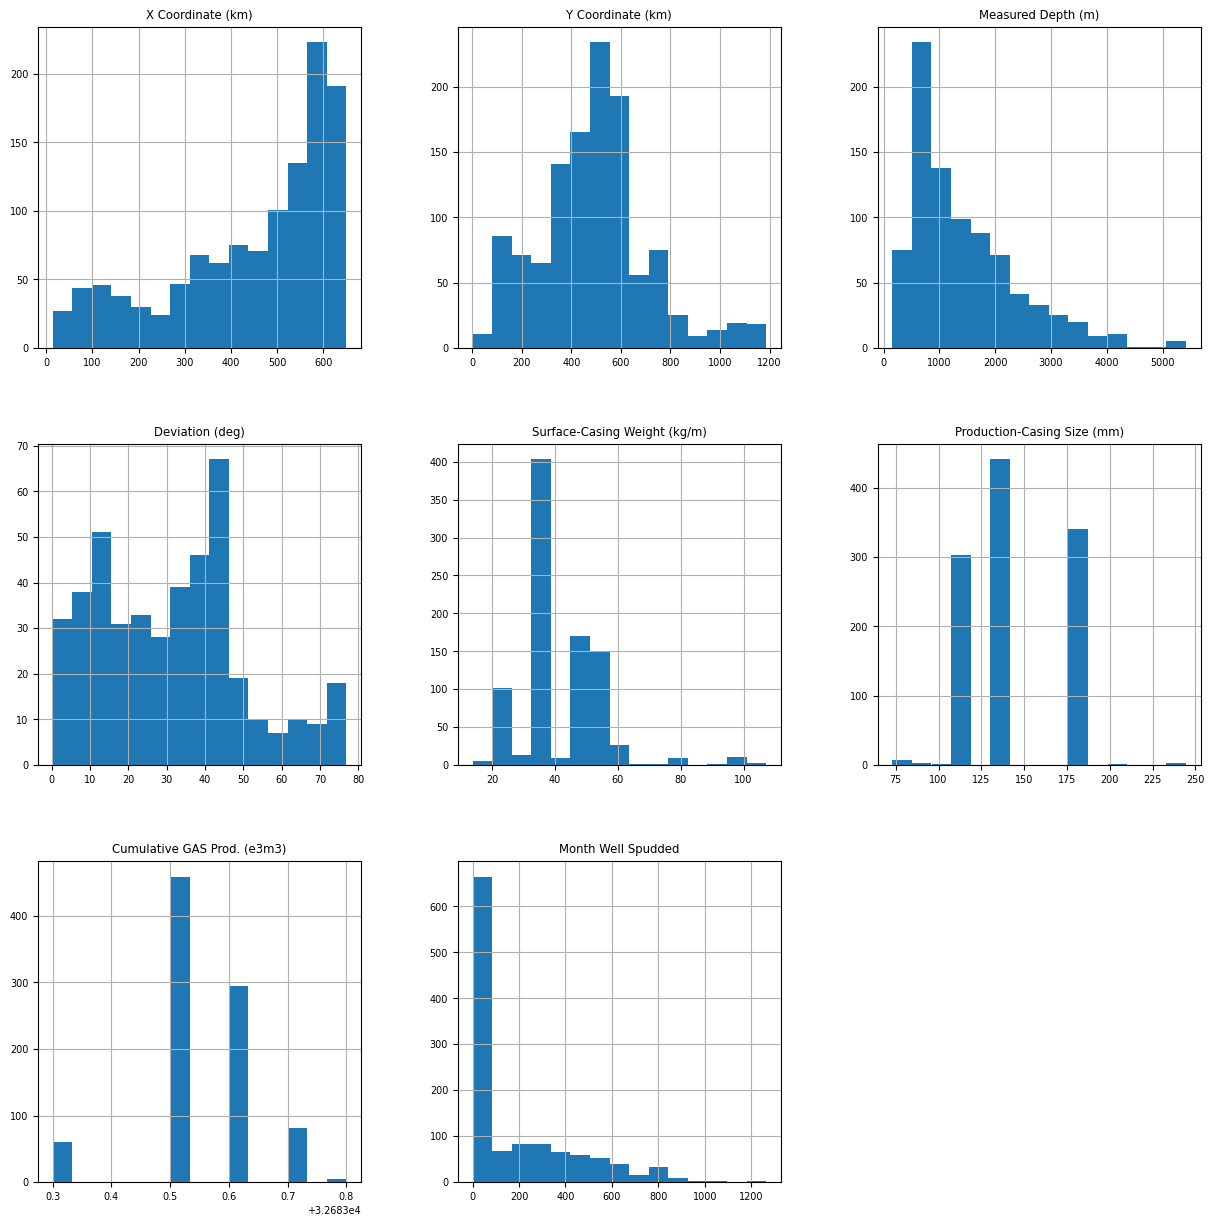

In [39]:
columns=['X Coordinate (km)','Y Coordinate (km)','Measured Depth (m)','Deviation (deg)', 'Surface-Casing Weight (kg/m)', 'Production-Casing Size (mm)', 'Cumulative GAS Prod. (e3m3)', 'Month Well Spudded']# names of columns for which u want to make a histogram
X_train[columns].hist(bins=15, layout=(3, 3), figsize=(15,15)) # 3 rows and 3 columns # figure size is the spread of the histogram
plt.show()

Here we observe that Emission Rate, Deviation (deg), Measured Depth and Y coordinate have a normal distibution. X-Coordinate is negatively skewed distribution. Cumulative Gas, measured Depth, Month Well Spudded are positively skewed distribution. The histograms are very similar to the intial dataset,and not much has changed in them

Here are better histograms of training data

In [40]:
def histplt (val,bins,title,xlabl,xlimt,axt=None): #python function
    """ Function for histogram plotting"""
    from matplotlib.offsetbox import AnchoredText
    
    ax1 = axt or plt.axes()# left or right plot
    val=np.array(val) # values in the plot
    plt.hist(val, bins=bins,ec='black')      
    n=len(val) # number of values in the plot
    Mean=np.mean(val)
    SD=np.sqrt(np.var(val))
    Max=np.amax(val)
    Min=np.amin(val)
    txt='n=%.0f \n $\mu$=%.1f \n $\sigma$=%.1f \n Max=%.1f \n Min=%.1f'
    anchored_text = AnchoredText(txt %(n,Mean,SD,Max,Min), loc=2)
    ax1.add_artist(anchored_text)
    plt.title(title,fontsize=font['size']*1.25)   
    plt.xlabel(xlabl,fontsize=font['size'])            
    plt.ylabel('Frequency',fontsize=font['size'])
    plt.xlim(xlimt)
    ax1.grid(linewidth='0.35')

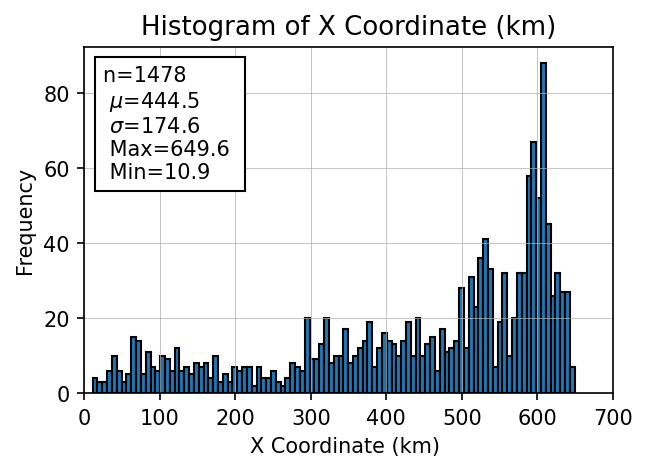

In [41]:
font = {'size'   : 10} #10 changes the font size of#s in ur plot
matplotlib.rc('font', **font)
fig = plt.subplots(figsize=(10, 3), dpi= 150, facecolor='w', edgecolor='k')#dpi makesplot small, dpi=100 to begin with

ax1=plt.subplot(1,2,1) 
val=df['X Coordinate (km)']
histplt(val,bins=100,title='Histogram of X Coordinate (km)',xlabl='X Coordinate (km) ',xlimt=(0,700),axt=ax1)
#hidplt function is above

In [42]:
def histplt (val,bins,title,xlabl,xlimt,axt=None): #python function
    """ Function for histogram plotting"""
    from matplotlib.offsetbox import AnchoredText
    
    ax1 = axt or plt.axes()# left or right plot
    val=np.array(val) # values in the plot
    plt.hist(val, bins=bins,ec='black')      
    n=len(val) # number of values in the plot
    Mean=np.mean(val)
    SD=np.sqrt(np.var(val))
    Max=np.amax(val)
    Min=np.amin(val)
    txt='n=%.0f \n $\mu$=%.1f \n $\sigma$=%.1f \n Max=%.1f \n Min=%.1f'
    anchored_text = AnchoredText(txt %(n,Mean,SD,Max,Min), loc=1)
    ax1.add_artist(anchored_text)
    plt.title(title,fontsize=font['size']*1.25)   
    plt.xlabel(xlabl,fontsize=font['size'])            
    plt.ylabel('Frequency',fontsize=font['size'])
    plt.xlim(xlimt)
    ax1.grid(linewidth='0.35')

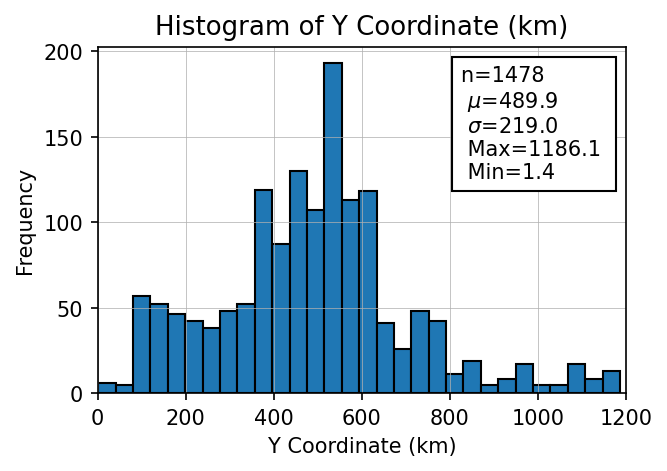

In [43]:
font = {'size'   : 10} #10 changes the font size of#s in ur plot
matplotlib.rc('font', **font)
fig = plt.subplots(figsize=(10, 3), dpi= 150, facecolor='w', edgecolor='k')#dpi makesplot small, dpi=100 to begin with

ax2=plt.subplot(1,2,2) 
val=df['Y Coordinate (km)']
histplt(val,bins=30,title='Histogram of Y Coordinate (km)',xlabl='Y Coordinate (km)',xlimt=(0,1200),axt=ax2)

Even though both the graphs have the same number of data poits, X Coordinate has a lower mean and lower standard deviation as compared to Y axis. The max values for the Y coordinate histogram are higher than X coordinate. X Coordiante histogram is skewed towards right i.e. it depicts as negatively skewed distribution. On the contary, Y Coordinate histogram depicts a uniform distribution.


IMPUTATION

Applying imputation to missing values in X_train dataset Note that imputation is not applied to text data, or to target data. The target data has already been removed so we ust need to remove the text variable - Abandoned (True/False) from the dataset.

Column - Abandoned (True/False) has been removed from the datatset.

Imputation has been applied on the entire dataset and not just on the columns that are mising values as it does not matter. Also median has been chosen as the imputation measurement. Applying median on all the numerical values. We will apply this same imputation on the target dataset.

In [44]:
from sklearn.impute import SimpleImputer

imput_mdn = SimpleImputer(strategy="median") 

In [45]:
train_num = X_train.drop("Abandoned (True/False)", axis=1)
train_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   X Coordinate (km)             1182 non-null   float64
 1   Y Coordinate (km)             1182 non-null   float64
 2   Measured Depth (m)            851 non-null    float64
 3   Deviation (deg)               438 non-null    float64
 4   Surface-Casing Weight (kg/m)  904 non-null    float64
 5   Production-Casing Size (mm)   1100 non-null   float64
 6   Cumulative GAS Prod. (e3m3)   900 non-null    float64
 7   Month Well Spudded            1182 non-null   float64
dtypes: float64(8)
memory usage: 74.0 KB


In [46]:
imput_mdn.fit(train_num) # fit is the function u called to ur data set #imput_mdn is now a new dataset following fit
imput_mdn.statistics_# after fitting it will calculate the statics that u chose in SimpleImputer # statics is the mean, mean of all features

array([5.09250000e+02, 5.00050000e+02, 1.11240000e+03, 3.12082458e+01,
       3.57000000e+01, 1.39700000e+02, 3.26835000e+04, 0.00000000e+00])

In [47]:
im = imput_mdn.transform(train_num)
im

array([[  524.5,   380.2,   786.2, ...,   139.7, 32683.6,   650.7],
       [   46.3,   823.2,  2915.5, ...,   139.7, 32683.7,   814.2],
       [  637.9,   460.2,  1050. , ...,   139.7, 32683.5,   209.7],
       ...,
       [  604.6,   487.3,  1112.4, ...,   114.3, 32683.5,     0. ],
       [  482.8,   248.6,  1743.1, ...,   114.3, 32683.7,     0. ],
       [  542.5,   148.3,  1112.4, ...,   139.7, 32683.6,     0. ]])

In [48]:
X_train_im = pd.DataFrame(im, columns=train_num.columns)#numpy(nmerical data) to pd 
#im is numerical dataframe,#Oil_Prod_num.columns -apply on all the column of the newly created data-oil_prod_num(without any categorical values)
#im numerical data frame and convert it to pandas 
#pandas as before imputation
X_train_im

,X Coordinate (km),Y Coordinate (km),Measured Depth (m),Deviation (deg),Surface-Casing Weight (kg/m),Production-Casing Size (mm),Cumulative GAS Prod. (e3m3),Month Well Spudded
0,524.5,380.2,786.2,19.348187,35.7,139.7,32683.6,650.7
1,46.3,823.2,2915.5,65.623685,35.7,139.7,32683.7,814.2
2,637.9,460.2,1050.0,31.208246,62.5,139.7,32683.5,209.7
3,605.3,555.2,1112.4,24.413819,53.6,177.8,32683.3,0.0
4,594.0,447.4,1525.0,44.209760,48.1,177.8,32683.6,578.4
...,...,...,...,...,...,...,...,...
1177,36.4,655.8,716.6,31.208246,41.7,139.7,32683.6,0.0
1178,605.1,512.3,1871.1,31.208246,35.7,177.8,32683.5,0.0
1179,604.6,487.3,1112.4,22.017888,35.7,114.3,32683.5,0.0
1180,482.8,248.6,1743.1,45.737238,35.7,114.3,32683.7,0.0


In [49]:
X_train_im.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   X Coordinate (km)             1182 non-null   float64
 1   Y Coordinate (km)             1182 non-null   float64
 2   Measured Depth (m)            1182 non-null   float64
 3   Deviation (deg)               1182 non-null   float64
 4   Surface-Casing Weight (kg/m)  1182 non-null   float64
 5   Production-Casing Size (mm)   1182 non-null   float64
 6   Cumulative GAS Prod. (e3m3)   1182 non-null   float64
 7   Month Well Spudded            1182 non-null   float64
dtypes: float64(8)
memory usage: 74.0 KB


CONCLUSION - All the values have been replaced with median

ONE HOT ENCODING THE NUMBERICAL COLUMN - Abandoned (True/False)

One Hot Encoding has been selected for the Abandoned (True/False) column as True and False

In [50]:
Abandoned_cat = X_train[['Abandoned (True/False)']]
Abandoned_cat[0:10]

,Abandoned (True/False)
0,1
1,1
2,0
3,1
4,1
5,1
6,0
7,1
8,0
9,1


In [51]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
Abandoned_cat_2hot = cat_encoder.fit_transform(Abandoned_cat) # fit_trasfer of data 
Abandoned_cat_toarray_2=Abandoned_cat_2hot.toarray()#NUMPY TO ARRAY
Abandoned_cat_toarray_2[0:10]

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.]])

# STANDARDIZATION OF IMPUTED VARIABLES

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()#call StandardScaler.
X_train_im_Std=scaler.fit_transform(X_train_im)#fit transform
X_train_im_Std

array([[ 0.45824867, -0.50543615, -0.68201153, ..., -0.16618648,
         0.85737697,  1.88049809],
       [-2.28786776,  1.50437761,  1.90278773, ..., -0.16618648,
         2.07689513,  2.53317191],
       [ 1.10946073, -0.1424901 , -0.3617795 , ..., -0.16618648,
        -0.36214118,  0.12007514],
       ...,
       [ 0.91823179, -0.01954213, -0.28603091, ..., -1.17642856,
        -0.36214118, -0.71702394],
       [ 0.21878181, -1.10248241,  0.47958825, ..., -1.17642856,
         2.07689513, -0.71702394],
       [ 0.56161567, -1.55752602, -0.28603091, ..., -0.16618648,
         0.85737697, -0.71702394]])

In [53]:
X_train_im_Std.mean()

-1.2489574518427943e-11

In [54]:
X_train_im_Std.std()

1.0

The mean is 0 and the standard deviation is 1 for the new X_train dataset. So, the X_train dataset is now stanrdardized.

In [55]:
X_train_im_Std = pd.DataFrame(X_train_im_Std, columns=X_train_im.columns)#numpy(nmerical data) to pd 
#im is numerical dataframe,#X_train_im.columns -use those column names for the newly created data
#im numerical data frame and convert it to pandas 
X_train_im_Std

,X Coordinate (km),Y Coordinate (km),Measured Depth (m),Deviation (deg),Surface-Casing Weight (kg/m),Production-Casing Size (mm),Cumulative GAS Prod. (e3m3),Month Well Spudded
0,0.458249,-0.505436,-0.682012,-1.019400,-0.417717,-0.166186,0.857377,1.880498
1,-2.287868,1.504378,1.902788,2.959633,-0.417717,-0.166186,2.076895,2.533172
2,1.109461,-0.142490,-0.361780,0.000396,1.911171,-0.166186,-0.362141,0.120075
3,0.922252,0.288508,-0.286031,-0.583827,1.137771,1.349177,-2.801177,-0.717024
4,0.857360,-0.200561,0.214832,1.118341,0.659828,1.349177,0.857377,1.591885
...,...,...,...,...,...,...,...,...
1177,-2.344720,0.744913,-0.766500,0.000396,0.103676,-0.166186,0.857377,-0.717024
1178,0.921103,0.093879,0.634970,0.000396,-0.417717,1.349177,-0.362141,-0.717024
1179,0.918232,-0.019542,-0.286031,-0.789843,-0.417717,-1.176429,-0.362141,-0.717024
1180,0.218782,-1.102482,0.479588,1.249682,-0.417717,-1.176429,2.076895,-0.717024


CONCATANATION of STANRARDIZED DATA AND ONE-HOT ENCODNG column

In [56]:
concatenated_X_train=np.concatenate((X_train_im_Std, Abandoned_cat_toarray_2), axis=1)# concanate columns together
#Oil_Prod_im_Std is just created above
concatenated_X_train[0:4]

array([[ 4.58248673e-01, -5.05436155e-01, -6.82011525e-01,
        -1.01939953e+00, -4.17717109e-01, -1.66186483e-01,
         8.57376975e-01,  1.88049809e+00,  0.00000000e+00,
         1.00000000e+00],
       [-2.28786776e+00,  1.50437761e+00,  1.90278773e+00,
         2.95963286e+00, -4.17717109e-01, -1.66186483e-01,
         2.07689513e+00,  2.53317191e+00,  0.00000000e+00,
         1.00000000e+00],
       [ 1.10946073e+00, -1.42490102e-01, -3.61779503e-01,
         3.96287431e-04,  1.91117083e+00, -1.66186483e-01,
        -3.62141177e-01,  1.20075137e-01,  1.00000000e+00,
         0.00000000e+00],
       [ 9.22251617e-01,  2.88508335e-01, -2.86030912e-01,
        -5.83827428e-01,  1.13777148e+00,  1.34917663e+00,
        -2.80117748e+00, -7.17023941e-01,  0.00000000e+00,
         1.00000000e+00]])

In [57]:
concatenated_X_train.shape

(1182, 10)

In [58]:
X_train_new = pd.DataFrame(concatenated_X_train)
X_train_new [0:10]

,0,1,2,3,4,5,6,7,8,9
0,0.458249,-0.505436,-0.682012,-1.019400,-0.417717,-0.166186,0.857377,1.880498,0.0,1.0
1,-2.287868,1.504378,1.902788,2.959633,-0.417717,-0.166186,2.076895,2.533172,0.0,1.0
2,1.109461,-0.142490,-0.361780,0.000396,1.911171,-0.166186,-0.362141,0.120075,1.0,0.0
3,0.922252,0.288508,-0.286031,-0.583827,1.137771,1.349177,-2.801177,-0.717024,0.0,1.0
4,0.857360,-0.200561,0.214832,1.118341,0.659828,1.349177,0.857377,1.591885,0.0,1.0
5,0.405417,-0.304455,0.701129,0.580959,-1.321465,-1.176429,2.076895,2.209430,0.0,1.0
6,0.933737,0.239057,-0.378410,-1.570181,0.659828,1.349177,-0.362141,-0.717024,1.0,0.0
7,0.886647,0.154218,0.487843,0.000396,-0.417717,1.349177,-0.362141,1.323230,0.0,1.0
8,-1.226059,0.030363,-1.059905,0.000396,1.129082,-1.176429,-0.362141,0.025867,1.0,0.0
9,0.520843,-1.147397,-0.495553,0.000396,-0.417717,-0.166186,-0.362141,-0.717024,0.0,1.0


In [59]:
X_train_new.shape

(1182, 10)

In [60]:
X_train_new = X_train_new.rename({0: 'X Coordinate (km)', 1: 'Y Coordinate (km)', 2: 'Measured Depth (m)', 3: 'Deviation (deg)', 4: 'Surface-Casing Weight (kg/m)', 5: 'Production-Casing Size (mm)',6: 'Cumulative GAS Prod. (e3m3)',7: 'Month Well Spudded', 8: 'Abandoned (False)', 9: 'Abandoned (True)'}, axis=1)

X_train_new

,X Coordinate (km),Y Coordinate (km),Measured Depth (m),Deviation (deg),Surface-Casing Weight (kg/m),Production-Casing Size (mm),Cumulative GAS Prod. (e3m3),Month Well Spudded,Abandoned (False),Abandoned (True)
0,0.458249,-0.505436,-0.682012,-1.019400,-0.417717,-0.166186,0.857377,1.880498,0.0,1.0
1,-2.287868,1.504378,1.902788,2.959633,-0.417717,-0.166186,2.076895,2.533172,0.0,1.0
2,1.109461,-0.142490,-0.361780,0.000396,1.911171,-0.166186,-0.362141,0.120075,1.0,0.0
3,0.922252,0.288508,-0.286031,-0.583827,1.137771,1.349177,-2.801177,-0.717024,0.0,1.0
4,0.857360,-0.200561,0.214832,1.118341,0.659828,1.349177,0.857377,1.591885,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
1177,-2.344720,0.744913,-0.766500,0.000396,0.103676,-0.166186,0.857377,-0.717024,0.0,1.0
1178,0.921103,0.093879,0.634970,0.000396,-0.417717,1.349177,-0.362141,-0.717024,0.0,1.0
1179,0.918232,-0.019542,-0.286031,-0.789843,-0.417717,-1.176429,-0.362141,-0.717024,0.0,1.0
1180,0.218782,-1.102482,0.479588,1.249682,-0.417717,-1.176429,2.076895,-0.717024,0.0,1.0


# Model Training and Evaluation
DUMMY CLASSIFIER

In [61]:
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier

clf = DummyClassifier(random_state=42)#dummy classifier uses random data
clf.fit(X_train_new,y_train)#fit the data
import warnings
warnings.filterwarnings('ignore')

Dummy_accuracies=cross_val_score(clf,X_train_new,y_train, cv=5, scoring="accuracy")

np.mean(Dummy_accuracies)

0.5118465279267681

The accuracy of dummy classifer is approximately 50%. It is a good starting point.

# STOCASTIC GRADIENT DESCENT. Fine-tune 'penalty', 'eta0', 'early_stopping'

In [62]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.linear_model import SGDClassifier
from numpy import random
np.random.seed(42) 

model = SGDClassifier(random_state =42)
param_grid = [{
'eta0': randint(low=0, high=2), 'penalty' :['l2', 'l1', 'elasticnet'],'early_stopping': [True, False]
                  }]
gs = RandomizedSearchCV(model,param_grid,cv=5, n_iter = 1000, scoring="accuracy",random_state =42)
gs.fit(X_train_new, y_train)
gs.best_params_

{'early_stopping': False, 'eta0': 1, 'penalty': 'l2'}

In [63]:
cvreslt=gs.cv_results_

cvreslt_params=[str(i) for i in cvreslt["params"]]

for accuracy, params in sorted(zip(cvreslt["mean_test_score"], cvreslt_params)):
    print(np.mean(accuracy), params)

0.7504433955517413 {'early_stopping': True, 'eta0': 0, 'penalty': 'l1'}
0.7504433955517413 {'early_stopping': True, 'eta0': 0, 'penalty': 'l1'}
0.7504433955517413 {'early_stopping': True, 'eta0': 0, 'penalty': 'l1'}
0.7504433955517413 {'early_stopping': True, 'eta0': 0, 'penalty': 'l1'}
0.7504433955517413 {'early_stopping': True, 'eta0': 0, 'penalty': 'l1'}
0.7504433955517413 {'early_stopping': True, 'eta0': 0, 'penalty': 'l1'}
0.7504433955517413 {'early_stopping': True, 'eta0': 0, 'penalty': 'l1'}
0.7504433955517413 {'early_stopping': True, 'eta0': 0, 'penalty': 'l1'}
0.7504433955517413 {'early_stopping': True, 'eta0': 0, 'penalty': 'l1'}
0.7504433955517413 {'early_stopping': True, 'eta0': 0, 'penalty': 'l1'}
0.7504433955517413 {'early_stopping': True, 'eta0': 0, 'penalty': 'l1'}
0.7504433955517413 {'early_stopping': True, 'eta0': 0, 'penalty': 'l1'}
0.7504433955517413 {'early_stopping': True, 'eta0': 0, 'penalty': 'l1'}
0.7504433955517413 {'early_stopping': True, 'eta0': 0, 'penalty'

In [64]:
clf = SGDClassifier(eta0=0, penalty='l1', early_stopping= False, random_state= 42)
clf.fit(X_train_new,y_train)

SGD_accuracies=cross_val_score(clf,X_train_new,y_train, cv=5, scoring="accuracy")

np.mean(SGD_accuracies)

0.7571694200100122

Accuracy has improved from 50% as calculated by the dummy classifier to approximately 76% or the SGD Classifier.

# LOGISTIC REGRESSION.Fine-tune 'penalty', 'max_iter', 'C'

In [65]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import randint
from numpy import random
np.random.seed(42) 

model = LogisticRegression(random_state = 42)
import warnings
warnings.filterwarnings('ignore')

param_grid = [{
'max_iter': randint(low=1, high=1000), 'penalty' :['l2', 'l1', 'elasticnet','none'],
    'C': randint(low=0.0, high=200)
                  }]
gs = RandomizedSearchCV(model,param_grid,cv=5, n_iter=1000, scoring="accuracy",random_state = 42)
gs.fit(X_train_new, y_train)
gs.best_params_

{'C': 176, 'max_iter': 3, 'penalty': 'l2'}

In [66]:
cvreslt=gs.cv_results_

cvreslt_params=[str(i) for i in cvreslt["params"]]

for accuracy, params in sorted(zip(cvreslt["mean_test_score"], cvreslt_params)):
    print(np.mean(accuracy), params)

0.8113637988986626 {'C': 102, 'max_iter': 436, 'penalty': 'l2'}
0.8113637988986626 {'C': 14, 'max_iter': 107, 'penalty': 'none'}
nan {'C': 188, 'max_iter': 21, 'penalty': 'elasticnet'}
nan {'C': 121, 'max_iter': 467, 'penalty': 'elasticnet'}
0.8113637988986626 {'C': 116, 'max_iter': 100, 'penalty': 'none'}
0.8113637988986626 {'C': 128, 'max_iter': 648, 'penalty': 'none'}
0.8113637988986626 {'C': 129, 'max_iter': 340, 'penalty': 'none'}
0.8113637988986626 {'C': 166, 'max_iter': 274, 'penalty': 'none'}
0.8113637988986626 {'C': 171, 'max_iter': 509, 'penalty': 'none'}
0.8113637988986626 {'C': 21, 'max_iter': 253, 'penalty': 'none'}
0.8113637988986626 {'C': 52, 'max_iter': 770, 'penalty': 'none'}
0.8113637988986626 {'C': 74, 'max_iter': 459, 'penalty': 'none'}
nan {'C': 151, 'max_iter': 131, 'penalty': 'l1'}
nan {'C': 157, 'max_iter': 806, 'penalty': 'l1'}
0.8113637988986626 {'C': 191, 'max_iter': 956, 'penalty': 'l2'}
nan {'C': 160, 'max_iter': 460, 'penalty': 'l1'}
nan {'C': 88, 'max_ite

In [67]:
clf = LogisticRegression(C=54, max_iter=912, penalty='none', random_state= 42)
clf.fit(X_train_new,y_train)

Logistic_Regression_accuracies=cross_val_score(clf,X_train_new,y_train, cv=5, scoring="accuracy")

np.mean(Logistic_Regression_accuracies)

0.8113637988986626

Accuracy has improved to 79% for the Logistic Classifier. It has the highest accuracy so far.

# SUPPORT VECTOR MACHINE-LINEAR: Linear.Fine-tune 'C', 'loss'.

In [68]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import LinearSVC
from scipy.stats import randint
np.random.seed(42) 

model = LinearSVC(random_state = 42) 

param_grid = [{
 'loss': ['hinge','squared_hinge'],'C': randint(low=0.0, high=200)
                  }]

gs = RandomizedSearchCV(model,param_grid,cv=5, n_iter = 2000, scoring="accuracy",random_state = 42, n_jobs=-1)
gs.fit(X_train_new, y_train)
gs.best_params_

{'C': 50, 'loss': 'hinge'}

In [69]:
cvreslt=gs.cv_results_

cvreslt_params=[str(i) for i in cvreslt["params"]]

for accuracy, params in sorted(zip(cvreslt["mean_test_score"], cvreslt_params)):
    print(np.mean(accuracy), params)

0.7030715869269828 {'C': 180, 'loss': 'squared_hinge'}
0.7063720231709933 {'C': 148, 'loss': 'squared_hinge'}
0.7063720231709933 {'C': 148, 'loss': 'squared_hinge'}
0.7098011871558321 {'C': 188, 'loss': 'squared_hinge'}
0.7106700994064221 {'C': 181, 'loss': 'squared_hinge'}
0.7106808267181578 {'C': 121, 'loss': 'squared_hinge'}
0.7106808267181578 {'C': 121, 'loss': 'squared_hinge'}
0.714024172209111 {'C': 187, 'loss': 'squared_hinge'}
0.714024172209111 {'C': 187, 'loss': 'squared_hinge'}
0.714056354144318 {'C': 184, 'loss': 'squared_hinge'}
0.7182936422799113 {'C': 182, 'loss': 'squared_hinge'}
0.7224951727097189 {'C': 186, 'loss': 'squared_hinge'}
0.7224951727097189 {'C': 186, 'loss': 'squared_hinge'}
0.7250268182793391 {'C': 185, 'loss': 'squared_hinge'}
0.7250339698204964 {'C': 169, 'loss': 'squared_hinge'}
0.7250339698204964 {'C': 169, 'loss': 'squared_hinge'}
0.7251126367732247 {'C': 176, 'loss': 'squared_hinge'}
0.7251126367732247 {'C': 176, 'loss': 'squared_hinge'}
0.72668240005

In [70]:
clf = LinearSVC(C=71,loss='hinge', random_state= 42)
clf.fit(X_train_new,y_train)

SVM_linear_accuracies=cross_val_score(clf,X_train_new,y_train, cv=5, scoring="accuracy")

np.mean(SVM_linear_accuracies)

0.8071372380748052

Accuracy has improved slightly to approx. 81% for the Linear SVC Classifier.

# SUPPORT VECTOR MACHINE-POLYNOMINAL KERNEL Fine-tune 'degree', 'coef0', 'C'.

In [71]:

from sklearn.svm import SVC
from scipy.stats import randint

np.random.seed(42)
model = SVC(random_state = 42) 

param_grid = [{
'kernel': ['poly'], 'C' : randint(low=0.01, high=200),'degree': randint(low=1, high=20),
    'coef0' : randint(low=0.0, high=2)
               }]




In [72]:
cvreslt=gs.cv_results_

cvreslt_params=[str(i) for i in cvreslt["params"]]

for accuracy, params in sorted(zip(cvreslt["mean_test_score"], cvreslt_params)):
    print(np.mean(accuracy), params)

0.7030715869269828 {'C': 180, 'loss': 'squared_hinge'}
0.7063720231709933 {'C': 148, 'loss': 'squared_hinge'}
0.7063720231709933 {'C': 148, 'loss': 'squared_hinge'}
0.7098011871558321 {'C': 188, 'loss': 'squared_hinge'}
0.7106700994064221 {'C': 181, 'loss': 'squared_hinge'}
0.7106808267181578 {'C': 121, 'loss': 'squared_hinge'}
0.7106808267181578 {'C': 121, 'loss': 'squared_hinge'}
0.714024172209111 {'C': 187, 'loss': 'squared_hinge'}
0.714024172209111 {'C': 187, 'loss': 'squared_hinge'}
0.714056354144318 {'C': 184, 'loss': 'squared_hinge'}
0.7182936422799113 {'C': 182, 'loss': 'squared_hinge'}
0.7224951727097189 {'C': 186, 'loss': 'squared_hinge'}
0.7224951727097189 {'C': 186, 'loss': 'squared_hinge'}
0.7250268182793391 {'C': 185, 'loss': 'squared_hinge'}
0.7250339698204964 {'C': 169, 'loss': 'squared_hinge'}
0.7250339698204964 {'C': 169, 'loss': 'squared_hinge'}
0.7251126367732247 {'C': 176, 'loss': 'squared_hinge'}
0.7251126367732247 {'C': 176, 'loss': 'squared_hinge'}
0.72668240005

METHOD 1

In [73]:
clf = SVC(kernel="poly", degree=2, coef0=1, C=75, random_state = 42)
clf.fit(X_train_new,y_train)

SVC_accuracies=cross_val_score(clf,X_train_new,y_train, cv=5, scoring="accuracy")

np.mean(SVC_accuracies)

0.8671851534005578

METHOD 2

In [74]:
from sklearn.pipeline import Pipeline
clf = Pipeline([("svm_clf",SVC(kernel="poly", degree=2, coef0=1, C=75, random_state=42))])
clf.fit(X_train_new,y_train)

Accuracies=cross_val_score(clf,X_train_new,y_train, cv=5, scoring="accuracy")

np.mean(Accuracies)

0.8671851534005578

The accuracy of the poly SVC is 86% which is the highest accruacy so far

# Decision Tree - Fine-tune 'max_depth','min_samples_split','min_samples_leaf'.


In [75]:
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint
np.random.seed(42)
model = DecisionTreeClassifier(random_state =42)
#import warnings
#warnings.filterwarnings('ignore')

param_grid = [{
'max_depth': randint(low=1, high=100),'min_samples_leaf': randint(low=0.1, high=10), 
    'min_samples_split': randint(low=0.1, high=10)
               }]





In [76]:
cvreslt=gs.cv_results_

cvreslt_params=[str(i) for i in cvreslt["params"]]

for accuracy, params in sorted(zip(cvreslt["mean_test_score"], cvreslt_params)):
    print(np.mean(accuracy), params)

0.7030715869269828 {'C': 180, 'loss': 'squared_hinge'}
0.7063720231709933 {'C': 148, 'loss': 'squared_hinge'}
0.7063720231709933 {'C': 148, 'loss': 'squared_hinge'}
0.7098011871558321 {'C': 188, 'loss': 'squared_hinge'}
0.7106700994064221 {'C': 181, 'loss': 'squared_hinge'}
0.7106808267181578 {'C': 121, 'loss': 'squared_hinge'}
0.7106808267181578 {'C': 121, 'loss': 'squared_hinge'}
0.714024172209111 {'C': 187, 'loss': 'squared_hinge'}
0.714024172209111 {'C': 187, 'loss': 'squared_hinge'}
0.714056354144318 {'C': 184, 'loss': 'squared_hinge'}
0.7182936422799113 {'C': 182, 'loss': 'squared_hinge'}
0.7224951727097189 {'C': 186, 'loss': 'squared_hinge'}
0.7224951727097189 {'C': 186, 'loss': 'squared_hinge'}
0.7250268182793391 {'C': 185, 'loss': 'squared_hinge'}
0.7250339698204964 {'C': 169, 'loss': 'squared_hinge'}
0.7250339698204964 {'C': 169, 'loss': 'squared_hinge'}
0.7251126367732247 {'C': 176, 'loss': 'squared_hinge'}
0.7251126367732247 {'C': 176, 'loss': 'squared_hinge'}
0.72668240005

In [77]:
clf = DecisionTreeClassifier(max_depth=6, min_samples_leaf=1, min_samples_split=2, random_state = 42)
clf.fit(X_train_new,y_train)

Decision_tree_accuracies=cross_val_score(clf,X_train_new,y_train, cv=5, scoring="accuracy")

np.mean(Decision_tree_accuracies)

0.8629514410355432

The accuracy of deicison tree is approximately 87%.

# RANDOM FOREST Fine-tune 'n_estimators','max_depth','min_samples_split','bootstrap'.

In [78]:
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
np.random.seed(42)
model_rnd = RandomForestClassifier(random_state =42)


param_grid = [{
'max_depth': randint(low=1, high=100),'n_estimators': randint(low=0.1, high=1000), 'min_samples_split': randint(low=0.1, high=10),'bootstrap': [True, False]
               }]


In [79]:
cvreslt=gs.cv_results_

cvreslt_params=[str(i) for i in cvreslt["params"]]

for accuracy, params in sorted(zip(cvreslt["mean_test_score"], cvreslt_params)):
    print(np.mean(accuracy), params)

0.7030715869269828 {'C': 180, 'loss': 'squared_hinge'}
0.7063720231709933 {'C': 148, 'loss': 'squared_hinge'}
0.7063720231709933 {'C': 148, 'loss': 'squared_hinge'}
0.7098011871558321 {'C': 188, 'loss': 'squared_hinge'}
0.7106700994064221 {'C': 181, 'loss': 'squared_hinge'}
0.7106808267181578 {'C': 121, 'loss': 'squared_hinge'}
0.7106808267181578 {'C': 121, 'loss': 'squared_hinge'}
0.714024172209111 {'C': 187, 'loss': 'squared_hinge'}
0.714024172209111 {'C': 187, 'loss': 'squared_hinge'}
0.714056354144318 {'C': 184, 'loss': 'squared_hinge'}
0.7182936422799113 {'C': 182, 'loss': 'squared_hinge'}
0.7224951727097189 {'C': 186, 'loss': 'squared_hinge'}
0.7224951727097189 {'C': 186, 'loss': 'squared_hinge'}
0.7250268182793391 {'C': 185, 'loss': 'squared_hinge'}
0.7250339698204964 {'C': 169, 'loss': 'squared_hinge'}
0.7250339698204964 {'C': 169, 'loss': 'squared_hinge'}
0.7251126367732247 {'C': 176, 'loss': 'squared_hinge'}
0.7251126367732247 {'C': 176, 'loss': 'squared_hinge'}
0.72668240005

In [80]:
rf = RandomForestClassifier(bootstrap = False, max_depth=12, min_samples_split=8 , n_estimators = 947, random_state = 42)
rf.fit(X_train_new,y_train)

Random_forest_accuracies=cross_val_score(rf,X_train_new,y_train, cv=5, scoring="accuracy")

np.mean(Random_forest_accuracies)


0.8790424086390617

Randomforest is the best classifer so far with an accuracy of approximately 88%.

RANKING THE IMPORTANCE FETAURES USING RANDOM FOREST ALGORITHIM.

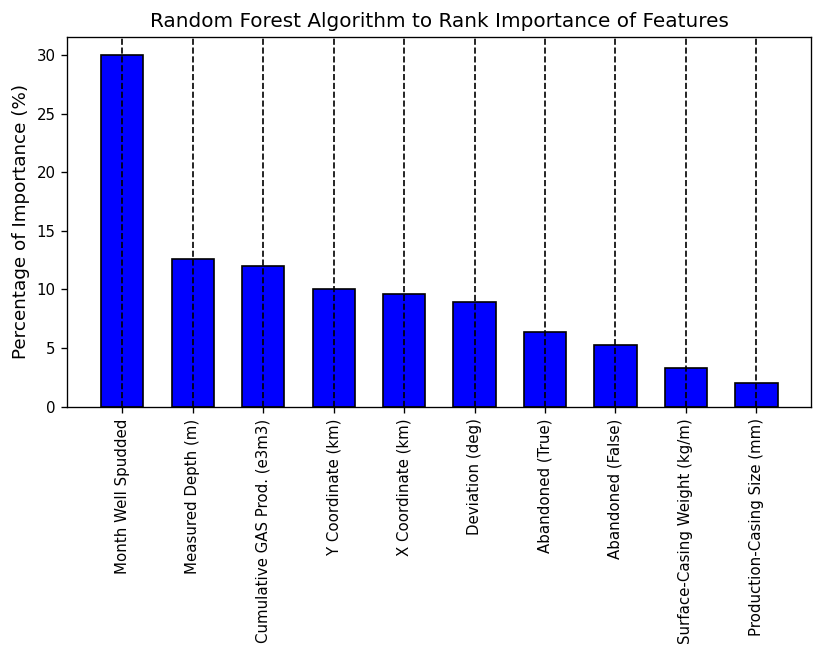

In [81]:
font = {'size'   : 9}
plt.rc('font', **font)
fig, ax1 = plt.subplots(figsize=(8, 4), dpi= 120, facecolor='w', edgecolor='k')
model_rnd.fit(X_train_new, y_train)
score=list((model_rnd.feature_importances_*100))
sort_low_high=np.sort(score, axis=0)
sort_high_low=sort_low_high[::-1]
clmns=list(X_train_new.columns)
sort_colms=[]
for i in range(len(sort_high_low)):
    ind=score.index(sort_high_low[i])
    sort_colms.append(clmns[ind])
index = np.arange(len(sort_high_low))
ax1.bar(index, sort_high_low, align='center',width=0.6, alpha=1, ecolor='black',edgecolor ='k', capsize=4,color='b')
#ax1.set_xlabel('Features',fontsize=12)
ax1.set_ylabel('Percentage of Importance (%)',fontsize=11)
ax1.set_xticks(np.arange(len(sort_colms)))
ax1.set_xticklabels(sort_colms, rotation=90)     
ax1.xaxis.grid(color='k', linestyle='--', linewidth=1) 
plt.title('Random Forest Algorithm to Rank Importance of Features',fontsize=12)
plt.show() 

# ENSEMBLED TECHNQIUES
ADAPTIVE BOOSTING Fine-tune 'n_estimators','learning_rate','algorithm'.

LinearSVC

In [82]:
from sklearn.ensemble import AdaBoostClassifier
from scipy.stats import randint
np.random.seed(42)

linearsvc = LinearSVC(C=71,loss='hinge', random_state= 42)
linearsvc.fit(X_train_new, y_train)
        
model = AdaBoostClassifier(linearsvc , random_state=42)

param_grid = [{
'learning_rate': randint(low=0.1, high=10),'n_estimators': randint(low=0.1, high=1000), 'algorithm': ['SAMME', 'SAMME.R']
               }]


In [83]:
cvreslt=gs.cv_results_

cvreslt_params=[str(i) for i in cvreslt["params"]]

for accuracy, params in sorted(zip(cvreslt["mean_test_score"], cvreslt_params)):
    print(np.mean(accuracy), params)

0.7030715869269828 {'C': 180, 'loss': 'squared_hinge'}
0.7063720231709933 {'C': 148, 'loss': 'squared_hinge'}
0.7063720231709933 {'C': 148, 'loss': 'squared_hinge'}
0.7098011871558321 {'C': 188, 'loss': 'squared_hinge'}
0.7106700994064221 {'C': 181, 'loss': 'squared_hinge'}
0.7106808267181578 {'C': 121, 'loss': 'squared_hinge'}
0.7106808267181578 {'C': 121, 'loss': 'squared_hinge'}
0.714024172209111 {'C': 187, 'loss': 'squared_hinge'}
0.714024172209111 {'C': 187, 'loss': 'squared_hinge'}
0.714056354144318 {'C': 184, 'loss': 'squared_hinge'}
0.7182936422799113 {'C': 182, 'loss': 'squared_hinge'}
0.7224951727097189 {'C': 186, 'loss': 'squared_hinge'}
0.7224951727097189 {'C': 186, 'loss': 'squared_hinge'}
0.7250268182793391 {'C': 185, 'loss': 'squared_hinge'}
0.7250339698204964 {'C': 169, 'loss': 'squared_hinge'}
0.7250339698204964 {'C': 169, 'loss': 'squared_hinge'}
0.7251126367732247 {'C': 176, 'loss': 'squared_hinge'}
0.7251126367732247 {'C': 176, 'loss': 'squared_hinge'}
0.72668240005

In [84]:
ab = AdaBoostClassifier(linearsvc, algorithm = 'SAMME', learning_rate=2, n_estimators=518, random_state = 42)
ab.fit(X_train_new,y_train)

adaptive_boosting_accuracies=cross_val_score(ab,X_train_new,y_train, cv=5, scoring="accuracy")

np.mean(adaptive_boosting_accuracies)

0.8138954444682829

The accuracy with the Adaptive Boosting with Linear SVC is approximately 81% which is the higehst accuracy so far .

Adaptive Boosting

In [85]:
from sklearn.ensemble import AdaBoostClassifier
from scipy.stats import randint
np.random.seed(42)
model = AdaBoostClassifier(random_state=42)

param_grid = [{
'learning_rate': randint(low=0.1, high=10),'n_estimators': randint(low=0.1, high=1000), 'algorithm': ['SAMME', 'SAMME.R']
               }]


In [86]:
cvreslt=gs.cv_results_

cvreslt_params=[str(i) for i in cvreslt["params"]]

for accuracy, params in sorted(zip(cvreslt["mean_test_score"], cvreslt_params)):
    print(np.mean(accuracy), params)

0.7030715869269828 {'C': 180, 'loss': 'squared_hinge'}
0.7063720231709933 {'C': 148, 'loss': 'squared_hinge'}
0.7063720231709933 {'C': 148, 'loss': 'squared_hinge'}
0.7098011871558321 {'C': 188, 'loss': 'squared_hinge'}
0.7106700994064221 {'C': 181, 'loss': 'squared_hinge'}
0.7106808267181578 {'C': 121, 'loss': 'squared_hinge'}
0.7106808267181578 {'C': 121, 'loss': 'squared_hinge'}
0.714024172209111 {'C': 187, 'loss': 'squared_hinge'}
0.714024172209111 {'C': 187, 'loss': 'squared_hinge'}
0.714056354144318 {'C': 184, 'loss': 'squared_hinge'}
0.7182936422799113 {'C': 182, 'loss': 'squared_hinge'}
0.7224951727097189 {'C': 186, 'loss': 'squared_hinge'}
0.7224951727097189 {'C': 186, 'loss': 'squared_hinge'}
0.7250268182793391 {'C': 185, 'loss': 'squared_hinge'}
0.7250339698204964 {'C': 169, 'loss': 'squared_hinge'}
0.7250339698204964 {'C': 169, 'loss': 'squared_hinge'}
0.7251126367732247 {'C': 176, 'loss': 'squared_hinge'}
0.7251126367732247 {'C': 176, 'loss': 'squared_hinge'}
0.72668240005

In [87]:
ab = AdaBoostClassifier( algorithm = 'SAMME.R', learning_rate=9, n_estimators=955, random_state = 42)
ab.fit(X_train_new,y_train)

adaptive_boosting_acc=cross_val_score(ab,X_train_new,y_train, cv=5, scoring="accuracy")

np.mean(adaptive_boosting_acc)

0.7368733462061073

The accuracy with the Adaptive Boosting is approximately 74% .

FINDING THE TOP THREE CLASSIFIERS FOR HARD AND SOFT VOTING

In [88]:
 clf_2=['Dummy','SGD',  'Logistic',  'Linear_SVC', 'Poly_SVC', 
     'Decision_tree','Random_Forest', 'Adaptive_boosting_linear_svc', 'Adaptive_boosting']
acc_all=[np.mean(Dummy_accuracies),np.mean(SGD_accuracies),
         np.mean(Logistic_Regression_accuracies),np.mean(SVM_linear_accuracies),np.mean(SVC_accuracies),
          np.mean(Decision_tree_accuracies),np.mean(Random_forest_accuracies),
         np.mean(adaptive_boosting_accuracies), np.mean(adaptive_boosting_acc)]
for i,clfier in enumerate(acc_all): 
    print(clf_2[i], acc_all[i])

Dummy 0.5118465279267681
SGD 0.7571694200100122
Logistic 0.8113637988986626
Linear_SVC 0.8071372380748052
Poly_SVC 0.8671851534005578
Decision_tree 0.8629514410355432
Random_Forest 0.8790424086390617
Adaptive_boosting_linear_svc 0.8138954444682829
Adaptive_boosting 0.7368733462061073


Here we see that Poly SVC, Decision Tree, and Random Forest are the top three classifiers.

# HARD VOTING

In [89]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
np.random.seed(42)
poly = SVC(kernel="poly", degree=2, coef0=1, C=75, random_state = 42)

decision_tree = DecisionTreeClassifier(max_depth=6, min_samples_leaf=1, min_samples_split=2, random_state = 42)

Random_forest = RandomForestClassifier(bootstrap = False, max_depth=12, min_samples_split=8 , n_estimators = 947, random_state = 42)

hard_voting = VotingClassifier(estimators=[('ab', poly ), ('gb', decision_tree), 
                                           ('rf', Random_forest)],voting='hard')
hard_voting.fit(X_train_new, y_train)

clf=['Poly_SVC:', 'Bagging_decision_tree:', 'Random Forest:', 'Hard Voting:']
i=0
for clfier in (poly, decision_tree, Random_forest, hard_voting):
    clfier.fit(X_train_new, y_train)
    Accuracies_hard=cross_val_score(clfier,X_train_new,y_train, cv=5, scoring="accuracy")
    print(clf[i], np.mean(Accuracies_hard))
    
    i+=1

Poly_SVC: 0.8671851534005578
Bagging_decision_tree: 0.8629514410355432
Random Forest: 0.8790424086390617
Hard Voting: 0.8815704784381035


The hard voting accuracy is 88%.

# SOFT VOTING

In [90]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
np.random.seed(42)
poly = SVC(kernel="poly", degree=2, coef0=1, C=75, random_state = 42,probability = True)

decision_tree = DecisionTreeClassifier(max_depth=6, min_samples_leaf=1, min_samples_split=2, random_state = 42)

Random_forest = RandomForestClassifier(bootstrap = False, max_depth=12, min_samples_split=8 , n_estimators = 947, random_state = 42)

soft_voting = VotingClassifier(estimators=[('ab', poly ), ('gb', decision_tree), 
                                           ('rf', Random_forest)],voting='soft')
soft_voting.fit(X_train_new, y_train)

clf=['Poly_SVC:', 'Bagging_decision_tree:', 'Random Forest:', 'Soft Voting:']
i=0
for clfier in (poly, decision_tree, Random_forest,soft_voting):
    clfier.fit(X_train_new, y_train)
    Accuracies_soft=cross_val_score(clfier,X_train_new,y_train, cv=5, scoring="accuracy")
    print(clf[i], np.mean(Accuracies_soft))
    
    i+=1

Poly_SVC: 0.8671851534005578
Bagging_decision_tree: 0.8629514410355432
Random Forest: 0.8790424086390617
Soft Voting: 0.8790209540155903


The soft voting accuracy is 87 %. This accuracy is lower than hard voting accuracy.

# SHALLOW NEURAL NETWORK
DIVING DATA INTO VALIDATION AND TRAINING FOR EARLY STOPPING

In [91]:
from sklearn.model_selection import train_test_split
##### Smaller Training
# You need to divid your data to smaller training set and validation set for early stopping.
Training_c=np.concatenate((X_train_new,np.array(y_train).reshape(-1,1)),axis=1)
Smaller_Training, Validation = train_test_split(Training_c, test_size=0.15, random_state=42)
# to avoid overfittting or epoch

#
Smaller_Training_Target=Smaller_Training[:,-1]
Smaller_Training=Smaller_Training[:,:-1]
#
Validation_Target=Validation[:,-1]
Validation=Validation[:,:-1]

In [92]:
def ANN (input_dim,neurons=50,loss="binary_crossentropy",activation="relu",Nout=1,
             metrics=['accuracy'],activation_out='sigmoid',dropout_rate=True):
    """ Function to run Neural Network for different hyperparameters"""
    # activation_out='sigmoid' not needed for regression
    np.random.seed(42)
    tf.random.set_seed(42)

    # create model
    model = keras.models.Sequential()
    
    # Input and Hidden Layer 1
    model.add(keras.layers.Dense(neurons,input_dim=input_dim, activation=activation))
    
    # Hidden Layer 2
    model.add(keras.layers.Dense(neurons,activation=activation)) 
    
    # Hidden Layer 3
    model.add(keras.layers.Dense(neurons,activation=activation)) 
    
    # Output Layer 
    model.add(keras.layers.Dense(Nout,activation=activation_out)) 
    
    # Compile model
    model.compile(optimizer='adam',loss=loss,metrics=metrics)
    return model

In [93]:
from keras.wrappers.scikit_learn import KerasClassifier 
from sklearn.model_selection import GridSearchCV
from tensorflow import keras
import tensorflow as tf

# define the grid search parameters
param_grid = {
    'neurons' : [50,100,150,200],
    'activation' : ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'],
    'dropout_rate' : [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
}
# we need to find tune #s for neurons
# we r kepping # of neurons same for all layers
# more #s, it takes more times
# u can find tune metrix, loss and acivation function

# Run Keras Classifier 
model = KerasClassifier(build_fn=ANN,input_dim=Smaller_Training.shape[1])
# the function above
#KerasClassifier for classsificaion
# others fixed ...confirm

# Apply Scikit Learn GridSearchCV
grid = GridSearchCV(estimator=model,param_grid=param_grid, cv=5)

# Early stopping to avoid overfitting
monitor= keras.callbacks.EarlyStopping(min_delta=1e-3,patience=5, verbose=0)
grid_result = grid.fit(Smaller_Training,Smaller_Training_Target,batch_size=32,validation_data=
                       (Validation,Validation_Target),callbacks=[monitor],
                   verbose=0,epochs=1000)

7/7 [==============================] - 0s 3ms/step - loss: 0.6944 - accuracy: 0.4776


7/7 [==============================] - 0s 4ms/step - loss: 0.3710 - accuracy: 0.8259


7/7 [==============================] - 0s 3ms/step - loss: 0.4354 - accuracy: 0.8259


7/7 [==============================] - 0s 3ms/step - loss: 0.3592 - accuracy: 0.8507


7/7 [==============================] - 0s 5ms/step - loss: 0.3499 - accuracy: 0.8550


7/7 [==============================] - 0s 3ms/step - loss: 0.4724 - accuracy: 0.7711


7/7 [==============================] - 0s 3ms/step - loss: 0.3769 - accuracy: 0.8308


7/7 [==============================] - 0s 6ms/step - loss: 0.4649 - accuracy: 0.7562


7/7 [==============================] - 0s 3ms/step - loss: 0.3483 - accuracy: 0.8650


In [94]:
# Best result of above run using k- fold cross validation
print("Best parameters: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best parameters: 0.860562 using {'activation': 'relu', 'dropout_rate': 0.8, 'neurons': 200}


In [95]:
Accuracy_snn = grid_result.best_score_

print("Accuracy for shallow neural network: ",Accuracy_snn)

Accuracy for shallow neural network:  0.8605621933937073


The accuracy using cross validation for three hiddden layer is approximately 86.6%.

MAKING PLOTS USING SLECTED HYPERPARAMTERS

In [96]:
# Call Function with fined-tune numebr of neurons
model_ft=ANN (input_dim=Smaller_Training.shape[1],neurons=150, dropout_rate= 0.0,activation= 'relu')  # put best paramater
    
# Early stopping to avoid overfitting
monitor= keras.callbacks.EarlyStopping(min_delta=1e-3,patience=5)
history=model_ft.fit(Smaller_Training,Smaller_Training_Target,batch_size=32,validation_data=
          (Validation,Validation_Target),callbacks=[monitor],verbose=1,epochs=1000)

Epoch 1/1000
32/32 [==============================] - 2s 13ms/step - loss: 0.5123 - accuracy: 0.7510 - val_loss: 0.4324 - val_accuracy: 0.8146
Epoch 2/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.3857 - accuracy: 0.8297 - val_loss: 0.4399 - val_accuracy: 0.8090
Epoch 3/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.3702 - accuracy: 0.8327 - val_loss: 0.4212 - val_accuracy: 0.8202
Epoch 4/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.3420 - accuracy: 0.8506 - val_loss: 0.4271 - val_accuracy: 0.8034
Epoch 5/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.3203 - accuracy: 0.8655 - val_loss: 0.4150 - val_accuracy: 0.8090
Epoch 6/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.3132 - accuracy: 0.8566 - val_loss: 0.3982 - val_accuracy: 0.8146
Epoch 7/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.2806 - accuracy: 0.8795 - val_loss: 0.4089 - val_accuracy: 0.8090
Epoch

In [97]:
import matplotlib.pyplot as plt

def plot(history): # plotting history

    font = {'size'   : 10}
    plt.rc('font', **font)
    fig, ax=plt.subplots(figsize=(12, 4), dpi= 110, facecolor='w', edgecolor='k')
    
    ax1 = plt.subplot(1,2,1)
    history_dict = history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    
    epochs = range(1, len(loss_values) + 1)
    plt.plot(epochs, loss_values, 'bo', label='Training loss')          
    plt.plot(epochs, val_loss_values, 'r', label='Validation loss',linewidth=2)    
    plt.title('Training and Validation Loss',fontsize=14)
    plt.xlabel('Epochs (Early Stopping)',fontsize=12)
    plt.ylabel('Loss',fontsize=11)
    plt.legend(fontsize='12')
#    plt.xlim((0, 0.8))
    
    ax2 = plt.subplot(1,2,2)    
    history_dict = history.history
    loss_values = history_dict['accuracy']
    val_loss_values = history_dict['val_accuracy']
    epochs = range(1, len(loss_values) + 1)
    ax2.plot(epochs, loss_values, 'ro', label='Training accuracy')          
    ax2.plot(epochs, val_loss_values, 'b', label='Validation accuracy',linewidth=2)    
    plt.title('Training and Validation Accuracy',fontsize=14)
    plt.xlabel('Epochs (Early Stopping)',fontsize=12)
    plt.ylabel('Accuracy',fontsize=12)
    plt.legend(fontsize='12')
#    plt.ylim((0.8, 0.99))
    plt.show() 

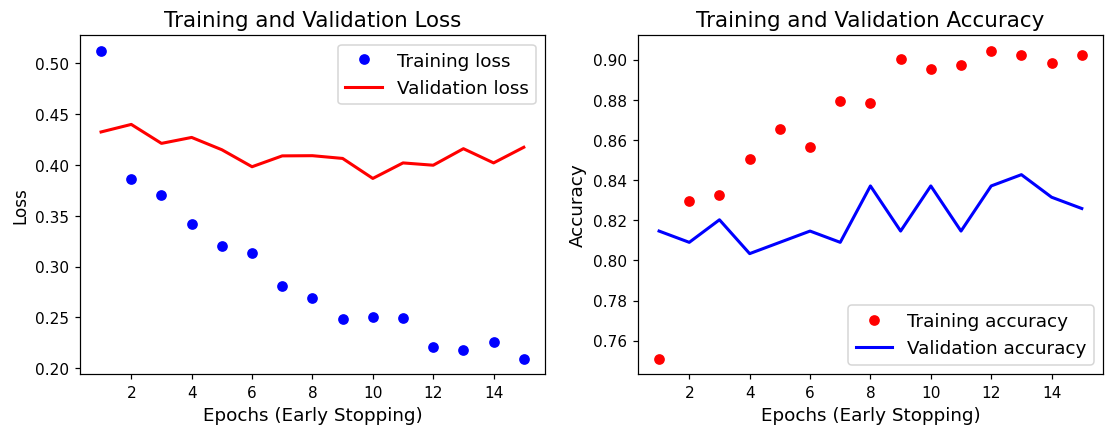

In [98]:
plot(history)

The plots show that as the training loss keeps on decreasing and the validation set loses keeps decreasing until it strats increasing beyond epoch 15. The accuracy of the training set is higher than validation set since the validation data set has not been seen before. Also, we see the code stopped well before epoch 1000 when overfitting started.

# DEEP NEURAL NETWORK - 6 HIDDEN LAYERS

In [99]:
def DNN (input_dim,neurons=50,loss="binary_crossentropy",activation="relu",Nout=1,L2_regularizer=False,
             metrics=['accuracy'],activation_out='sigmoid',init_mode=None,BatchOpt=False,dropout_rate=True):
    """ Function to run Deep Neural Network (6 hidden layer) for different hyperparameters"""
    # neurons is 50
    # dropout_rate is false we are not appplying it 
    #batch optimization does not help that much
    np.random.seed(42)
    tf.random.set_seed(42)
    
    if(activation=='Leaky_relu'): activation = keras.layers.LeakyReLU(alpha=0.2)
    if(L2_regularizer): kernel_regularizer=keras.regularizers.l2() 
    else: kernel_regularizer=None
        
    # create model
    model = keras.models.Sequential()
    
    # Input & Hidden Layer 1
    model.add(keras.layers.Dense(neurons,input_dim=input_dim, activation=activation, 
                                 kernel_initializer=init_mode,kernel_regularizer=kernel_regularizer))
    if(BatchOpt): model.add(keras.layers.BatchNormalization())
    if(dropout_rate):  model.add(keras.layers.Dropout(dropout_rate))
        
    # Hidden Layer 2
    model.add(keras.layers.Dense(neurons,activation=activation,
                                 kernel_initializer=init_mode,kernel_regularizer=kernel_regularizer))
    if(BatchOpt): model.add(keras.layers.BatchNormalization())
    if(dropout_rate):  model.add(keras.layers.Dropout(dropout_rate))
        
    # Hidden Layer 3    
    model.add(keras.layers.Dense(neurons,activation=activation,
                                 kernel_initializer=init_mode,kernel_regularizer=kernel_regularizer))                                 
    if(BatchOpt): model.add(keras.layers.BatchNormalization())
    if(dropout_rate):  model.add(keras.layers.Dropout(dropout_rate))
        
    # Hidden Layer 4    
    model.add(keras.layers.Dense(neurons,activation=activation,
                                 kernel_initializer=init_mode,kernel_regularizer=kernel_regularizer))                                 
    if(BatchOpt): model.add(keras.layers.BatchNormalization())
    if(dropout_rate):  model.add(keras.layers.Dropout(dropout_rate))

    # Hidden Layer 5    
    model.add(keras.layers.Dense(neurons,activation=activation,
                                 kernel_initializer=init_mode,kernel_regularizer=kernel_regularizer))                                 
    if(BatchOpt): model.add(keras.layers.BatchNormalization())
    if(dropout_rate):  model.add(keras.layers.Dropout(dropout_rate))        
        
    # Hidden Layer 6   
    model.add(keras.layers.Dense(neurons,activation=activation,
                                 kernel_initializer=init_mode,kernel_regularizer=kernel_regularizer))                                 
    if(BatchOpt): model.add(keras.layers.BatchNormalization())
    if(dropout_rate):  model.add(keras.layers.Dropout(dropout_rate))        
        
        
    # Output Layer 
    model.add(keras.layers.Dense(Nout,activation=activation_out)) 
        
    # Compile model
    model.compile(optimizer='adam',loss=loss,metrics=metrics)
    return model

In [100]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

# define the grid search parameters
#param_grid = {'init_mode' : ['he_normal', 'he_uniform'],'neurons' : [150,500,1000]
#             ,'dropout_rate' : [False,0.3, 0.4,0.5],'BatchOpt':[True,False],
#             'activation' : ['relu','elu', 'Leaky_relu'],'L2_regularizer':[True,False]}

param_grid = {'init_mode' : [None,'he_normal', 'he_uniform'],'neurons' : [50,100,150,200,250],'L2_regularizer':[True,False]
             ,'dropout_rate' : [True, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7],
              'activation': ['relu','elu', 'Leaky_relu']}

# Run Keras Classifier 
model = KerasClassifier(build_fn=DNN,input_dim=Smaller_Training.shape[1])

# Apply Scikit Learn GridSearchCV
#grid = GridSearchCV(model,param_grid, cv=2, scoring='accuracy')
grid = RandomizedSearchCV(model,param_grid,n_iter=40, cv=5, scoring='accuracy')

# Early stopping to avoid overfitting
monitor= keras.callbacks.EarlyStopping(min_delta=1e-3,patience=5, verbose=0)
grid_result = grid.fit(Smaller_Training,Smaller_Training_Target,batch_size=32,validation_data=
                       (Validation,Validation_Target),callbacks=[monitor],verbose=0,epochs=1000)

7/7 [==============================] - 0s 3ms/step


In [101]:
grid_result.best_params_

{'neurons': 100,
 'init_mode': 'he_uniform',
 'dropout_rate': 0.5,
 'activation': 'relu',
 'L2_regularizer': True}

In [102]:
Accuracy_dnn=grid_result.best_score_

print("Accuracy for deep neural network: ",Accuracy_dnn)

Accuracy for deep neural network:  0.8755174129353233


The accuracy of deep neural network with 6 hidden layers using k-fols cross-validation is 87% which is better than the shallow neural network.

In [103]:
model_DNN = DNN (input_dim=Smaller_Training.shape[1],neurons=50,Nout=1,L2_regularizer= True,
        init_mode= 'he_normal', dropout_rate= 0.4,activation= 'relu')

# Early stopping to avoid overfitting
monitor= keras.callbacks.EarlyStopping(min_delta=1e-3,patience=3)
history=model_DNN.fit(Smaller_Training,Smaller_Training_Target,batch_size=32,validation_data=
          (Validation,Validation_Target),callbacks=[monitor],verbose=1,epochs=1000)

Epoch 1/1000
32/32 [==============================] - 3s 14ms/step - loss: 7.5372 - accuracy: 0.5110 - val_loss: 6.3728 - val_accuracy: 0.6517
Epoch 2/1000
32/32 [==============================] - 0s 5ms/step - loss: 6.7318 - accuracy: 0.5120 - val_loss: 6.1152 - val_accuracy: 0.6573
Epoch 3/1000
32/32 [==============================] - 0s 5ms/step - loss: 6.2401 - accuracy: 0.4900 - val_loss: 5.8601 - val_accuracy: 0.6798
Epoch 4/1000
32/32 [==============================] - 0s 5ms/step - loss: 5.8620 - accuracy: 0.5259 - val_loss: 5.5998 - val_accuracy: 0.6966
Epoch 5/1000
32/32 [==============================] - 0s 5ms/step - loss: 5.5617 - accuracy: 0.5637 - val_loss: 5.3460 - val_accuracy: 0.6798
Epoch 6/1000
32/32 [==============================] - 0s 5ms/step - loss: 5.3042 - accuracy: 0.5349 - val_loss: 5.0947 - val_accuracy: 0.6573
Epoch 7/1000
32/32 [==============================] - 0s 5ms/step - loss: 5.0251 - accuracy: 0.5349 - val_loss: 4.8437 - val_accuracy: 0.6798
Epoch

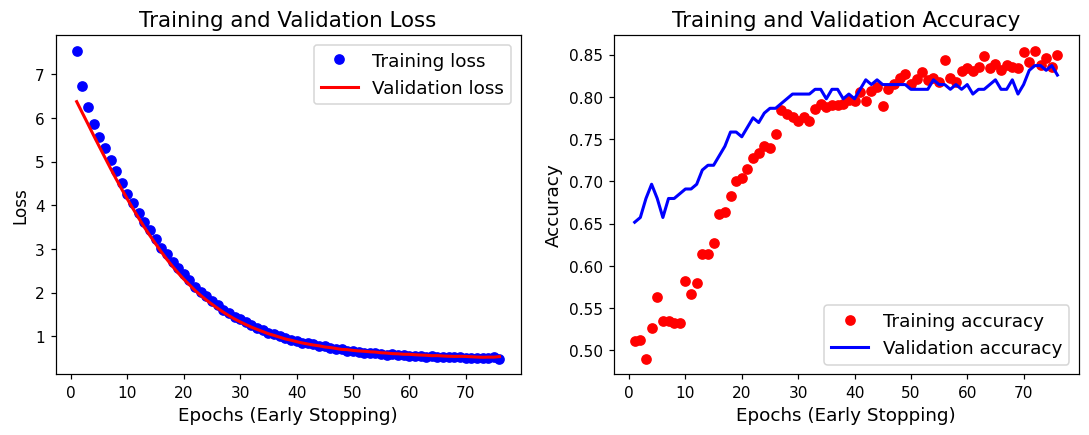

In [104]:
plot(history)

The plots show that as the training loss keeps on decreasing and the validation set loses decreasing. The accuracy of the training set is higher than validation set since the validation data set has not been seen before. Also, we see the code stopped well before epoch 1000 when overfitting started.

The performance of the deep neural network is lot better shallow neural network. The accuracy of the neural network is better as well. The training set ran till epoch 78 after that the loss of validation set began increasing.

THE TOP PERFORMER ON ALL TRAINING DATASET

In [105]:
clf_2=['Dummy','SGD', 
       'Logistic',  'SVM_Linear', 'SVM_Poly', 
     'Decision_tree','Random_Forest', 
       'Adaptive_linear_SVM_Linear',  'Adaptive_Boosting',
       'soft','hard','shallow_nn','deep_nn',]
    
acc_all=[np.mean(Dummy_accuracies),np.mean(SGD_accuracies),
         np.mean(Logistic_Regression_accuracies),np.mean(SVM_linear_accuracies),np.mean(SVC_accuracies),
          np.mean(Decision_tree_accuracies),np.mean(Random_forest_accuracies),
         np.mean(adaptive_boosting_accuracies), np.mean(adaptive_boosting_acc),
         np.mean(Accuracies_soft),
        np.mean(Accuracies_hard),Accuracy_snn, Accuracy_dnn]

for i,clfier in enumerate(acc_all):
    print(clf_2[i], acc_all[i])

Dummy 0.5118465279267681
SGD 0.7571694200100122
Logistic 0.8113637988986626
SVM_Linear 0.8071372380748052
SVM_Poly 0.8671851534005578
Decision_tree 0.8629514410355432
Random_Forest 0.8790424086390617
Adaptive_linear_SVM_Linear 0.8138954444682829
Adaptive_Boosting 0.7368733462061073
soft 0.8790209540155903
hard 0.8815704784381035
shallow_nn 0.8605621933937073
deep_nn 0.8755174129353233


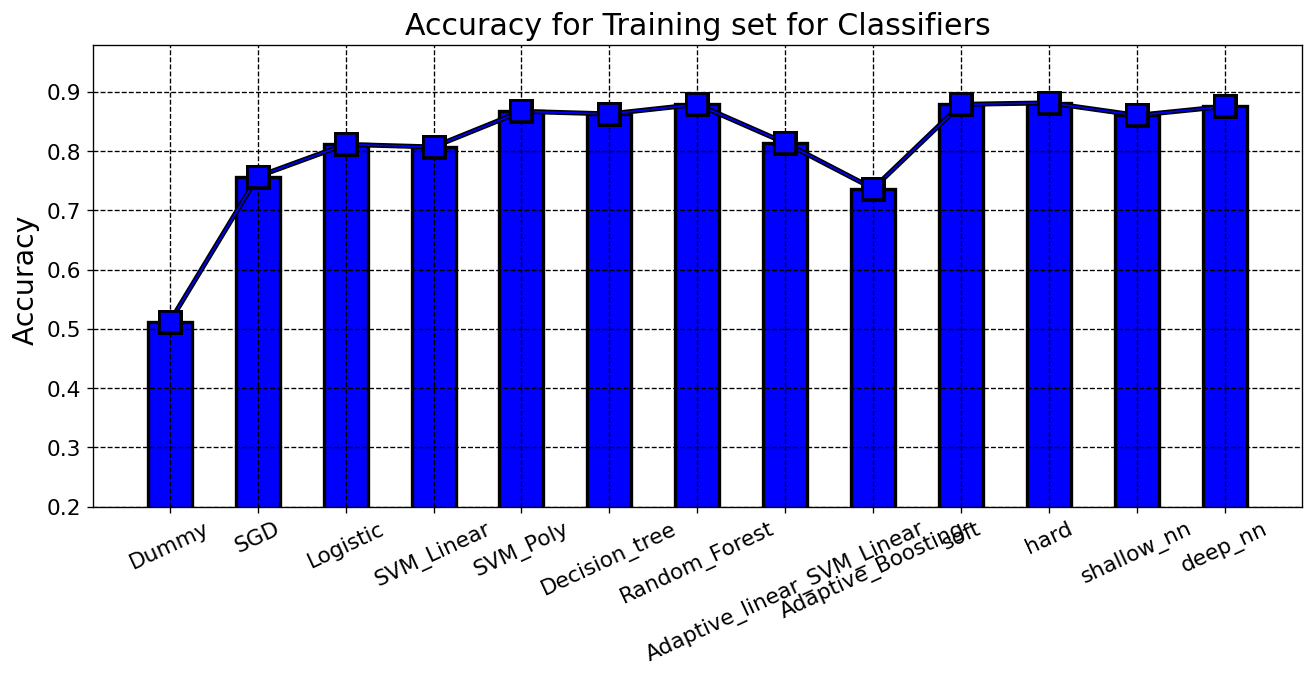

In [106]:
import matplotlib
import pylab as plt
import matplotlib.patheffects as pe
font = {'size'   :13}
matplotlib.rc('font', **font)
fig, ax1 = plt.subplots(figsize=(13, 5), dpi= 120, facecolor='w', edgecolor='k')
plt.plot(clf_2,acc_all,'bs-',linewidth=1,path_effects=[pe.Stroke(linewidth=3, foreground='k'), pe.Normal()],
markersize=12,label='Accuracy',markeredgecolor='k')
ax1.bar(clf_2,acc_all,lw =2, align='center',width=0.5, alpha=1, ecolor='black', edgecolor='k',capsize=1
,color='b')
plt.ylim((0.2, 0.98))
ax1.set_xticklabels(clf_2, rotation=25)
ax1.xaxis.grid(color='k', linestyle='--', linewidth=0.8)
ax1.yaxis.grid(color='k', linestyle='--', linewidth=0.8)
plt.ylabel('Accuracy ',fontsize='17')
plt.title('Accuracy for Training set for Classifiers',fontsize='18')
plt.show()

# FINDING THE BEST ALGORITHIM ON TRAINING DATASET
The top algorithim on training data set is random forest.

TESTING

In [107]:
test_set_strat

,X Coordinate (km),Y Coordinate (km),Measured Depth (m),Deviation (deg),Abandoned (True/False),Surface-Casing Weight (kg/m),Production-Casing Size (mm),Cumulative GAS Prod. (e3m3),Month Well Spudded,Classification
0,390.8,103.3,492.1,NaN,True,35.7,139.7,32683.6,303.8,0
1,627.7,402.8,1007.0,46.863732,False,35.7,139.7,NaN,239.0,0
2,606.4,451.2,NaN,NaN,True,NaN,177.8,NaN,0.0,0
3,250.2,393.6,NaN,8.168355,False,43.2,177.8,32683.7,0.0,0
4,605.5,579.6,4369.9,31.680734,True,53.6,177.8,32683.7,841.3,1
...,...,...,...,...,...,...,...,...,...,...
291,531.0,526.5,821.4,NaN,True,NaN,114.3,NaN,411.0,1
292,492.3,87.8,NaN,21.346908,True,20.8,139.7,32683.5,0.0,0
293,69.2,723.1,NaN,NaN,True,48.1,139.7,NaN,0.0,1
294,568.5,479.2,NaN,NaN,False,NaN,114.3,32683.3,0.0,0


In [108]:
# Remove target
X_test = test_set_strat.drop("Classification", axis=1) # test_set_strat = ?
y_test = test_set_strat["Classification"].copy()

In [109]:
X_test

,X Coordinate (km),Y Coordinate (km),Measured Depth (m),Deviation (deg),Abandoned (True/False),Surface-Casing Weight (kg/m),Production-Casing Size (mm),Cumulative GAS Prod. (e3m3),Month Well Spudded
0,390.8,103.3,492.1,NaN,True,35.7,139.7,32683.6,303.8
1,627.7,402.8,1007.0,46.863732,False,35.7,139.7,NaN,239.0
2,606.4,451.2,NaN,NaN,True,NaN,177.8,NaN,0.0
3,250.2,393.6,NaN,8.168355,False,43.2,177.8,32683.7,0.0
4,605.5,579.6,4369.9,31.680734,True,53.6,177.8,32683.7,841.3
...,...,...,...,...,...,...,...,...,...
291,531.0,526.5,821.4,NaN,True,NaN,114.3,NaN,411.0
292,492.3,87.8,NaN,21.346908,True,20.8,139.7,32683.5,0.0
293,69.2,723.1,NaN,NaN,True,48.1,139.7,NaN,0.0
294,568.5,479.2,NaN,NaN,False,NaN,114.3,32683.3,0.0


In [110]:
y_test

0      0
1      0
2      0
3      0
4      1
      ..
291    1
292    0
293    1
294    0
295    0
Name: Classification, Length: 296, dtype: int64

In [111]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   X Coordinate (km)             296 non-null    float64
 1   Y Coordinate (km)             296 non-null    float64
 2   Measured Depth (m)            205 non-null    float64
 3   Deviation (deg)               114 non-null    float64
 4   Abandoned (True/False)        296 non-null    bool   
 5   Surface-Casing Weight (kg/m)  218 non-null    float64
 6   Production-Casing Size (mm)   271 non-null    float64
 7   Cumulative GAS Prod. (e3m3)   230 non-null    float64
 8   Month Well Spudded            296 non-null    float64
dtypes: bool(1), float64(8)
memory usage: 18.9 KB


IMPUTATION

DEALING WITH TEXT COLUMN

In [112]:
df3 = X_test.drop(["Abandoned (True/False)" ], axis=1)# for ordinal encoding
df3

,X Coordinate (km),Y Coordinate (km),Measured Depth (m),Deviation (deg),Surface-Casing Weight (kg/m),Production-Casing Size (mm),Cumulative GAS Prod. (e3m3),Month Well Spudded
0,390.8,103.3,492.1,NaN,35.7,139.7,32683.6,303.8
1,627.7,402.8,1007.0,46.863732,35.7,139.7,NaN,239.0
2,606.4,451.2,NaN,NaN,NaN,177.8,NaN,0.0
3,250.2,393.6,NaN,8.168355,43.2,177.8,32683.7,0.0
4,605.5,579.6,4369.9,31.680734,53.6,177.8,32683.7,841.3
...,...,...,...,...,...,...,...,...
291,531.0,526.5,821.4,NaN,NaN,114.3,NaN,411.0
292,492.3,87.8,NaN,21.346908,20.8,139.7,32683.5,0.0
293,69.2,723.1,NaN,NaN,48.1,139.7,NaN,0.0
294,568.5,479.2,NaN,NaN,NaN,114.3,32683.3,0.0


We are replacing the df3 data with the median imputator from training data.

In [113]:
im = imput_mdn.transform(df3)

In [114]:
im

array([[  390.8,   103.3,   492.1, ...,   139.7, 32683.6,   303.8],
       [  627.7,   402.8,  1007. , ...,   139.7, 32683.5,   239. ],
       [  606.4,   451.2,  1112.4, ...,   177.8, 32683.5,     0. ],
       ...,
       [   69.2,   723.1,  1112.4, ...,   139.7, 32683.5,     0. ],
       [  568.5,   479.2,  1112.4, ...,   114.3, 32683.3,     0. ],
       [  423.4,   316.3,   532. , ...,   139.7, 32683.5,     0. ]])

In [115]:
X_test_im = pd.DataFrame(im, columns=df3.columns)#numpy(nmerical data) to pd 
#im is numerical dataframe,#Oil_Prod_num.columns -apply on all the column of the newly created data-oil_prod_num(without any categorical values)
#im numerical data frame and convert it to pandas 
#pandas as before imputation
X_test_im

,X Coordinate (km),Y Coordinate (km),Measured Depth (m),Deviation (deg),Surface-Casing Weight (kg/m),Production-Casing Size (mm),Cumulative GAS Prod. (e3m3),Month Well Spudded
0,390.8,103.3,492.1,31.208246,35.7,139.7,32683.6,303.8
1,627.7,402.8,1007.0,46.863732,35.7,139.7,32683.5,239.0
2,606.4,451.2,1112.4,31.208246,35.7,177.8,32683.5,0.0
3,250.2,393.6,1112.4,8.168355,43.2,177.8,32683.7,0.0
4,605.5,579.6,4369.9,31.680734,53.6,177.8,32683.7,841.3
...,...,...,...,...,...,...,...,...
291,531.0,526.5,821.4,31.208246,35.7,114.3,32683.5,411.0
292,492.3,87.8,1112.4,21.346908,20.8,139.7,32683.5,0.0
293,69.2,723.1,1112.4,31.208246,48.1,139.7,32683.5,0.0
294,568.5,479.2,1112.4,31.208246,35.7,114.3,32683.3,0.0


In [116]:
X_test_im.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   X Coordinate (km)             296 non-null    float64
 1   Y Coordinate (km)             296 non-null    float64
 2   Measured Depth (m)            296 non-null    float64
 3   Deviation (deg)               296 non-null    float64
 4   Surface-Casing Weight (kg/m)  296 non-null    float64
 5   Production-Casing Size (mm)   296 non-null    float64
 6   Cumulative GAS Prod. (e3m3)   296 non-null    float64
 7   Month Well Spudded            296 non-null    float64
dtypes: float64(8)
memory usage: 18.6 KB


ONE HOT ENCODING THE NUMBERICAL COLUMN - Abandoned (True/False)

In [117]:
Oil_Prod_cat = X_test[["Abandoned (True/False)"]]
Oil_Prod_cat_2hot = cat_encoder.fit_transform(Oil_Prod_cat)#not using any statics
cat_hot_toarray_2=Oil_Prod_cat_2hot.toarray()

STANDARDIZATION OF IMPUTED VARIABLES

In [118]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()#call StandardScaler.
X_test_im_Std=scaler.transform(X_test_im)#fit transform
X_test_im_Std

array([[-0.30953838, -1.76168318, -1.03902531, ..., -0.16618648,
         0.85737697,  0.49571187],
       [ 1.0508861 , -0.4029039 , -0.41397805, ..., -0.16618648,
        -0.36214118,  0.23703748],
       [ 0.92856849, -0.18332153, -0.28603091, ...,  1.34917663,
        -0.36214118, -0.71702394],
       ...,
       [-2.15636198,  1.05024136, -0.28603091, ..., -0.16618648,
        -0.36214118, -0.71702394],
       [ 0.71092354, -0.05629041, -0.28603091, ..., -1.17642856,
        -2.80117748, -0.71702394],
       [-0.12232927, -0.79533931, -0.99058992, ..., -0.16618648,
        -0.36214118, -0.71702394]])

In [119]:
X_test_im_Std.mean()

-0.030332797444740496

In [120]:
X_test_im_Std.std()

0.9817216005148204

The mean is 0 and the standard deviation is 1 for the new X_train dataset. So, the X_train dataset is now stanrdardized.

In [121]:
X_test_im_Std = pd.DataFrame(X_test_im_Std, columns=X_test_im.columns)#numpy(nmerical data) to pd 
#im is numerical dataframe,#X_train_im.columns -use those column names for the newly created data
#im numerical data frame and convert it to pandas 
X_test_im_Std

,X Coordinate (km),Y Coordinate (km),Measured Depth (m),Deviation (deg),Surface-Casing Weight (kg/m),Production-Casing Size (mm),Cumulative GAS Prod. (e3m3),Month Well Spudded
0,-0.309538,-1.761683,-1.039025,0.000396,-0.417717,-0.166186,0.857377,0.495712
1,1.050886,-0.402904,-0.413978,1.346545,-0.417717,-0.166186,-0.362141,0.237037
2,0.928568,-0.183322,-0.286031,0.000396,-0.417717,1.349177,-0.362141,-0.717024
3,-1.116949,-0.444643,-0.286031,-1.980705,0.234024,1.349177,2.076895,-0.717024
4,0.923400,0.399207,3.668313,0.041023,1.137771,1.349177,2.076895,2.641352
...,...,...,...,...,...,...,...,...
291,0.495576,0.158301,-0.639282,0.000396,-0.417717,-1.176429,-0.362141,0.923642
292,0.273337,-1.832004,-0.286031,-0.847538,-1.712509,-0.166186,-0.362141,-0.717024
293,-2.156362,1.050241,-0.286031,0.000396,0.659828,-0.166186,-0.362141,-0.717024
294,0.710924,-0.056290,-0.286031,0.000396,-0.417717,-1.176429,-2.801177,-0.717024


CONCATANATION of STANRARDIZED DATA AND ONE-HOT ENCODNG column

In [122]:
concatenated_X_test=np.concatenate((X_test_im_Std, cat_hot_toarray_2), axis=1)# concanate columns together
#Oil_Prod_im_Std is just created above
concatenated_X_test[0:4]

array([[-3.09538376e-01, -1.76168318e+00, -1.03902531e+00,
         3.96287431e-04, -4.17717109e-01, -1.66186483e-01,
         8.57376975e-01,  4.95711871e-01,  0.00000000e+00,
         1.00000000e+00],
       [ 1.05088610e+00, -4.02903895e-01, -4.13978051e-01,
         1.34654463e+00, -4.17717109e-01, -1.66186483e-01,
        -3.62141177e-01,  2.37037478e-01,  1.00000000e+00,
         0.00000000e+00],
       [ 9.28568489e-01, -1.83321533e-01, -2.86030912e-01,
         3.96287431e-04, -4.17717109e-01,  1.34917663e+00,
        -3.62141177e-01, -7.17023941e-01,  0.00000000e+00,
         1.00000000e+00],
       [-1.11694944e+00, -4.44642691e-01, -2.86030912e-01,
        -1.98070550e+00,  2.34023919e-01,  1.34917663e+00,
         2.07689513e+00, -7.17023941e-01,  1.00000000e+00,
         0.00000000e+00]])

In [123]:
X_test_new = pd.DataFrame(concatenated_X_test)
X_test_new [0:10]

,0,1,2,3,4,5,6,7,8,9
0,-0.309538,-1.761683,-1.039025,0.000396,-0.417717,-0.166186,0.857377,0.495712,0.0,1.0
1,1.050886,-0.402904,-0.413978,1.346545,-0.417717,-0.166186,-0.362141,0.237037,1.0,0.0
2,0.928568,-0.183322,-0.286031,0.000396,-0.417717,1.349177,-0.362141,-0.717024,0.0,1.0
3,-1.116949,-0.444643,-0.286031,-1.980705,0.234024,1.349177,2.076895,-0.717024,1.0,0.0
4,0.923400,0.399207,3.668313,0.041023,1.137771,1.349177,2.076895,2.641352,0.0,1.0
5,0.268743,0.356561,-0.286031,0.000396,-0.417717,-0.166186,0.857377,-0.717024,1.0,0.0
6,-2.195412,0.795272,-1.039511,0.000396,-0.417717,-0.166186,-0.362141,-0.717024,1.0,0.0
7,0.988866,-0.721843,-0.567903,-0.096132,-0.417717,-0.166186,2.076895,0.944799,1.0,0.0
8,-1.309327,0.503554,-1.012440,0.000396,-0.417717,-0.166186,-0.362141,-0.206062,0.0,1.0
9,0.416902,-1.790265,-0.286031,0.273331,-0.417717,-0.166186,0.857377,-0.717024,0.0,1.0


In [124]:
X_test_new = X_test_new.rename({0: 'X Coordinate (km)', 1: 'Y Coordinate (km)', 2: 'Measured Depth (m)', 3: 'Deviation (deg)', 4: 'Surface-Casing Weight (kg/m)', 5: 'Production-Casing Size (mm)',6: 'Cumulative GAS Prod. (e3m3)',7: 'Month Well Spudded', 8: 'Abandoned (False)', 9: 'Abandoned (True)'}, axis=1)

X_test_new

,X Coordinate (km),Y Coordinate (km),Measured Depth (m),Deviation (deg),Surface-Casing Weight (kg/m),Production-Casing Size (mm),Cumulative GAS Prod. (e3m3),Month Well Spudded,Abandoned (False),Abandoned (True)
0,-0.309538,-1.761683,-1.039025,0.000396,-0.417717,-0.166186,0.857377,0.495712,0.0,1.0
1,1.050886,-0.402904,-0.413978,1.346545,-0.417717,-0.166186,-0.362141,0.237037,1.0,0.0
2,0.928568,-0.183322,-0.286031,0.000396,-0.417717,1.349177,-0.362141,-0.717024,0.0,1.0
3,-1.116949,-0.444643,-0.286031,-1.980705,0.234024,1.349177,2.076895,-0.717024,1.0,0.0
4,0.923400,0.399207,3.668313,0.041023,1.137771,1.349177,2.076895,2.641352,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
291,0.495576,0.158301,-0.639282,0.000396,-0.417717,-1.176429,-0.362141,0.923642,0.0,1.0
292,0.273337,-1.832004,-0.286031,-0.847538,-1.712509,-0.166186,-0.362141,-0.717024,0.0,1.0
293,-2.156362,1.050241,-0.286031,0.000396,0.659828,-0.166186,-0.362141,-0.717024,0.0,1.0
294,0.710924,-0.056290,-0.286031,0.000396,-0.417717,-1.176429,-2.801177,-0.717024,1.0,0.0


TESTING CHECK

In [125]:
Dummy = DummyClassifier(random_state=42)
SGD = SGDClassifier(eta0=0, penalty='l1', early_stopping= False, random_state= 42)
Logistic = LogisticRegression(C=54, max_iter=912, penalty='none', random_state= 42)
Linear_SVC = LinearSVC(C=71,loss='hinge', random_state= 42)

Poly_SVC = SVC(kernel="poly", degree=2, coef0=1, C=75, random_state = 42) 

Decision_Tree = DecisionTreeClassifier(max_depth=6, min_samples_leaf=1, min_samples_split=2, random_state = 42) 

Random_Forest = RandomForestClassifier(bootstrap = False, max_depth=12, min_samples_split=8 , n_estimators = 947, random_state = 42) 

Adaptive_Linear_SVM = AdaBoostClassifier(linearsvc, algorithm = 'SAMME', learning_rate=2, n_estimators=518, random_state = 42)

Adaptive_Boosting = AdaBoostClassifier( algorithm = 'SAMME.R', learning_rate=9, n_estimators=955, random_state = 42)

soft_voting = VotingClassifier(estimators=[('ab', poly ), ('gb', decision_tree), 
                                           ('rf', Random_forest)],voting='soft')

hard_voting = VotingClassifier(estimators=[('ab', poly ), ('gb', decision_tree), 
                                           ('rf', Random_forest)],voting='hard')




clf=['Dummy','SGD', 'Logistic', 'Linear_SVC', 'Poly_SVC', 
     'Decision_tree','Random_Forest', 'Adaptive_Linear_SVM', 
      'Adaptive_Boosting' , 'soft_voting','hard_voting']
i=0
pre_acc=[]
for clfier in (Dummy,SGD, Logistic, Linear_SVC,Poly_SVC, 
     Decision_Tree,Random_Forest,Adaptive_Linear_SVM,Adaptive_Boosting,
     soft_voting,hard_voting):
    clfier.fit(X_test_new, y_test)
    y_pred = clfier.predict(X_test_new)
    acc=accuracy_score(y_test, y_pred)
    pre_acc.append(acc)
    
    print(clf[i], acc)
    i+=1

Dummy 0.5135135135135135
SGD 0.7297297297297297
Logistic 0.7804054054054054
Linear_SVC 0.7837837837837838
Poly_SVC 0.9087837837837838
Decision_tree 0.9087837837837838
Random_Forest 0.9898648648648649
Adaptive_Linear_SVM 0.7702702702702703
Adaptive_Boosting 0.7466216216216216
soft_voting 0.9594594594594594
hard_voting 0.9763513513513513


Testing on shallow neural network

In [126]:
from sklearn.metrics import accuracy_score

pred=model_ft.predict(X_test_new)
pred=[1 if i >= 0.5 else 0 for i in pred]

acr_shallow=accuracy_score(y_test, pred) 
print("Accuracy on test data for shallow neural network" , acr_shallow)

10/10 [==============================] - 0s 2ms/step
Accuracy on test data for shallow neural network 0.8513513513513513


Testing on deep neural network with 6 layers

In [127]:
from sklearn.metrics import accuracy_score

pred=model_DNN.predict(X_test_new)
pred=[1 if i >= 0.5 else 0 for i in pred]

acr_deep=accuracy_score(y_test, pred) 
print("Accuracy on test data for deep neural network with 6 layers " , acr_deep)

10/10 [==============================] - 0s 2ms/step
Accuracy on test data for deep neural network with 6 layers  0.831081081081081


The accuracy of both the neural network are lower than the respective accuracies on each algorithim on training data.

# FINDING THE BEST ALGORITHIM FOR CLASSIFICATION ON TEST DATA
The top algorithims according to test data is random forest.

# CONCLUSION
I would suggest using random forest for future data as it gives the best performance among all the algorithins on both test and training data se